##Comp3162 - Assignment 1
###Trishanna Ford - 620147893
####The dataset used for this assignment can be found [here](https://www.kaggle.com/datasets/avarice02/urinalysis-test-results), it is a dataset containing unrinalysis test results from a clinic in the Phillipines

####Section 1 - Data Acquisition

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

urinalysis = pd.read_csv('urinalysis_tests.csv')

####Section 2 - Data Exploration

Taking a look at the columns and the type of data stored in each, and just general exploration of the dataset



In [354]:
print(urinalysis.head())

   Unnamed: 0   Age  Gender         Color   Transparency   Glucose   Protein  \
0           0  76.0  FEMALE  LIGHT YELLOW          CLEAR  NEGATIVE  NEGATIVE   
1           1   9.0    MALE   DARK YELLOW  SLIGHTLY HAZY  NEGATIVE        1+   
2           2  12.0    MALE  LIGHT YELLOW  SLIGHTLY HAZY  NEGATIVE     TRACE   
3           3  77.0    MALE         BROWN         CLOUDY  NEGATIVE        1+   
4           4  29.0  FEMALE        YELLOW           HAZY  NEGATIVE     TRACE   

    pH  Specific Gravity  WBC     RBC Epithelial Cells Mucous Threads  \
0  5.0             1.010  1-3     0-2       OCCASIONAL           RARE   
1  5.0             1.030  1-3     0-2             RARE            FEW   
2  5.0             1.030  0-3     0-2             RARE            FEW   
3  6.0             1.020  5-8  LOADED             RARE           RARE   
4  6.0             1.025  1-4     0-2             RARE           RARE   

  Amorphous Urates    Bacteria Diagnosis  
0        NONE SEEN  OCCASIONAL  NEGAT

In [355]:
print(urinalysis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1436 non-null   int64  
 1   Age               1436 non-null   float64
 2   Gender            1436 non-null   object 
 3   Color             1435 non-null   object 
 4   Transparency      1436 non-null   object 
 5   Glucose           1436 non-null   object 
 6   Protein           1436 non-null   object 
 7   pH                1436 non-null   float64
 8   Specific Gravity  1436 non-null   float64
 9   WBC               1436 non-null   object 
 10  RBC               1436 non-null   object 
 11  Epithelial Cells  1436 non-null   object 
 12  Mucous Threads    1436 non-null   object 
 13  Amorphous Urates  1436 non-null   object 
 14  Bacteria          1436 non-null   object 
 15  Diagnosis         1436 non-null   object 
dtypes: float64(3), int64(1), object(12)
memory

In [356]:
column_names = urinalysis.columns.tolist()
print(column_names[1:])

['Age', 'Gender', 'Color', 'Transparency', 'Glucose', 'Protein', 'pH', 'Specific Gravity', 'WBC', 'RBC', 'Epithelial Cells', 'Mucous Threads', 'Amorphous Urates', 'Bacteria', 'Diagnosis']


In [357]:
dispersion = urinalysis.describe().loc[['std', 'min', 'max', '25%', '50%', '75%']]
print(dispersion)

      Unnamed: 0        Age        pH  Specific Gravity
std   414.681806  23.460032  0.598475          0.007285
min     0.000000   0.010000  5.000000          1.005000
max  1435.000000  92.000000  8.000000          1.030000
25%   358.750000   6.000000  6.000000          1.010000
50%   717.500000  23.000000  6.000000          1.015000
75%  1076.250000  45.000000  6.500000          1.020000


We can see from above that this dataset contains people from ages 1 month old to 92 years old. From below, we can see that the avergae age for memebers in the dataset is 27 years old, but greatest number of people have 1 or more of these attributes in common:
*   are 2 years old
*   female
*   urine with a pH balance of around 6
*   urine yellow in color
*   test negative

In [358]:
# Calculate mean for each column
mean_values = urinalysis[['Age','pH', 'Specific Gravity']].mean()
print("\nMean:")
print(mean_values)

# Calculate mode for each column
mode_values = urinalysis[['Age', 'Gender', 'Color', 'Transparency', 'Glucose', 'Protein', 'pH', 'Specific Gravity', 'WBC', 'RBC', 'Epithelial Cells', 'Mucous Threads', 'Amorphous Urates', 'Bacteria', 'Diagnosis']].mode()
print("Mode:")
print(mode_values)

# Calculate median for each column
median_values = urinalysis[['Age', 'pH', 'Specific Gravity']].median()
print("\nMedian:")
print(median_values)


Mean:
Age                 27.207521
pH                   6.052925
Specific Gravity     1.015850
dtype: float64
Mode:
   Age  Gender   Color Transparency   Glucose   Protein   pH  \
0  2.0  FEMALE  YELLOW        CLEAR  NEGATIVE  NEGATIVE  6.0   

   Specific Gravity  WBC  RBC Epithelial Cells Mucous Threads  \
0              1.01  0-2  0-2             RARE      NONE SEEN   

  Amorphous Urates Bacteria Diagnosis  
0        NONE SEEN     RARE  NEGATIVE  

Median:
Age                 23.000
pH                   6.000
Specific Gravity     1.015
dtype: float64


The graphs below show the distribution of the numerical values in the dataset

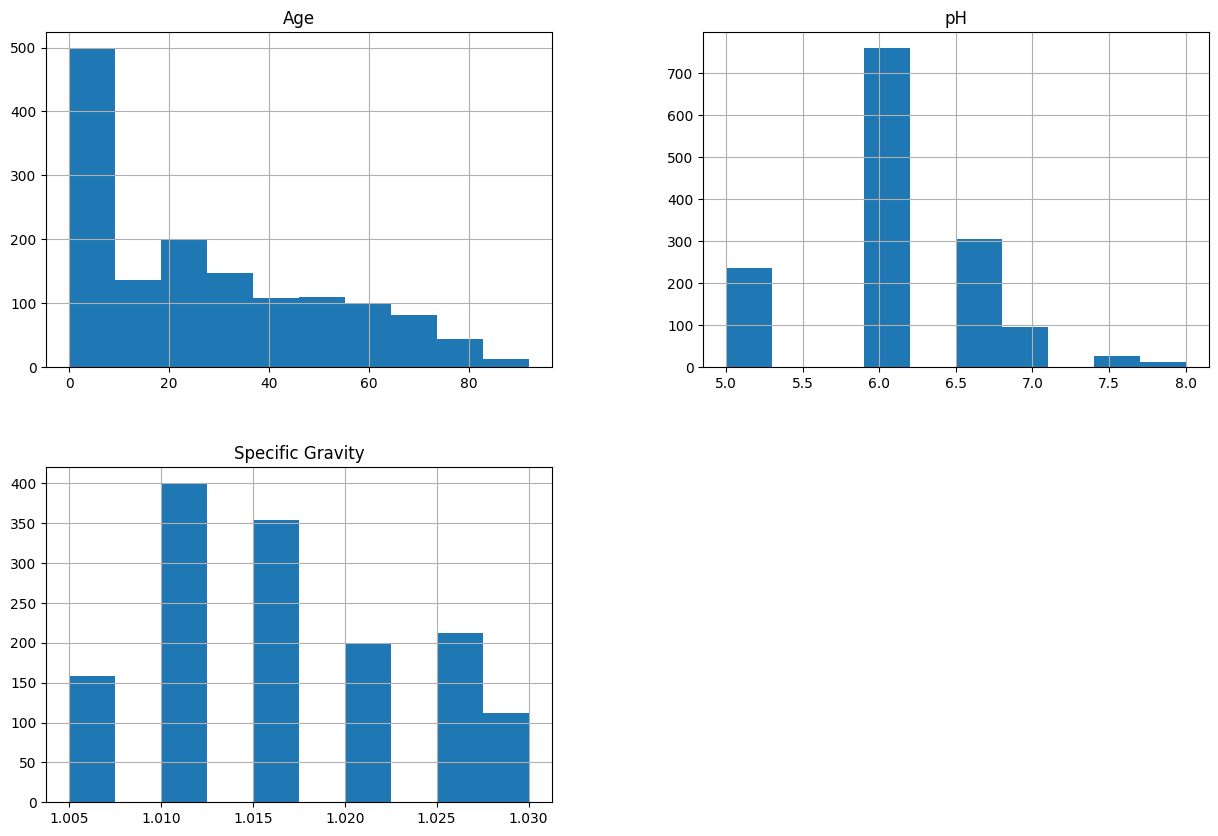

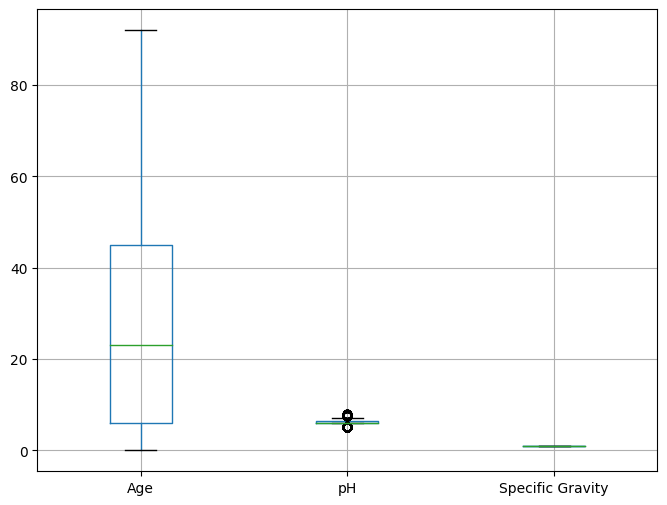

In [359]:
numerical_vars = ['Age','pH', 'Specific Gravity']
urinalysis[numerical_vars].hist(bins=10, figsize=(15, 10))
plt.show()

# Box plots
urinalysis[numerical_vars].boxplot(figsize=(8, 6))
plt.show()

The graphs below show the distribution of and gives a graphical representation of the categorical values in the dataset

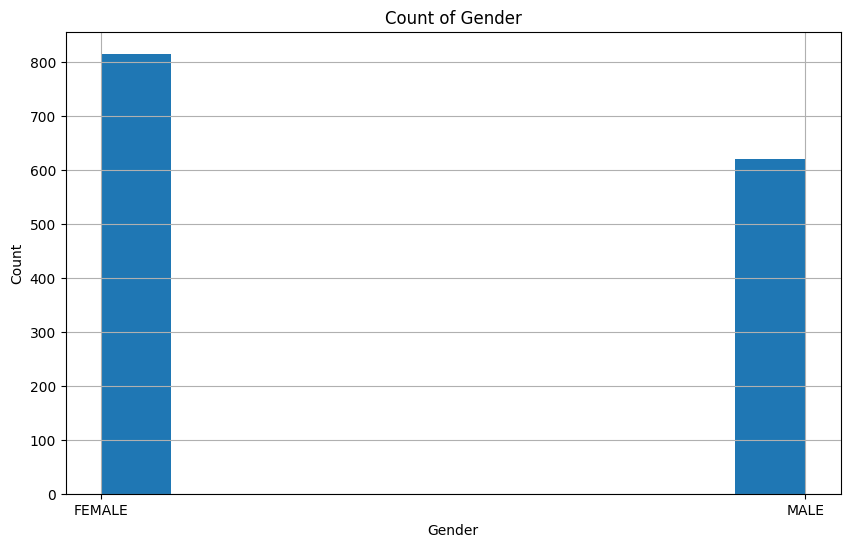

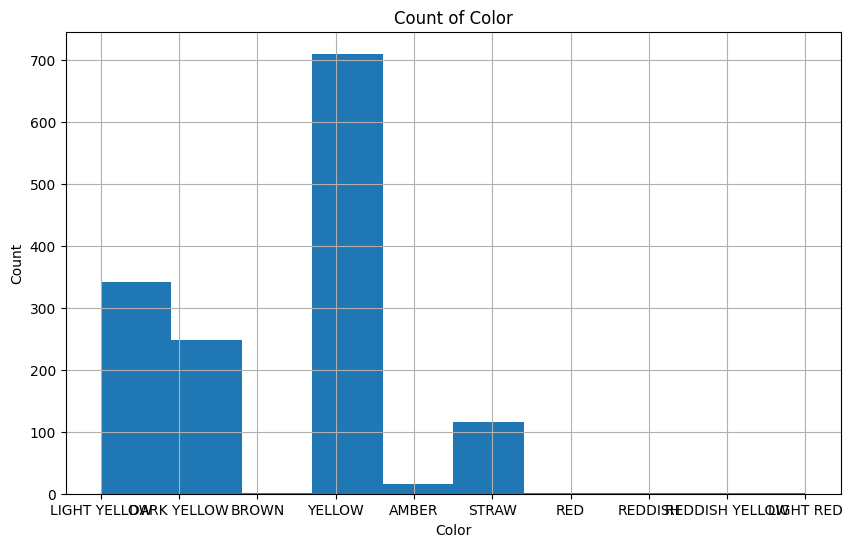

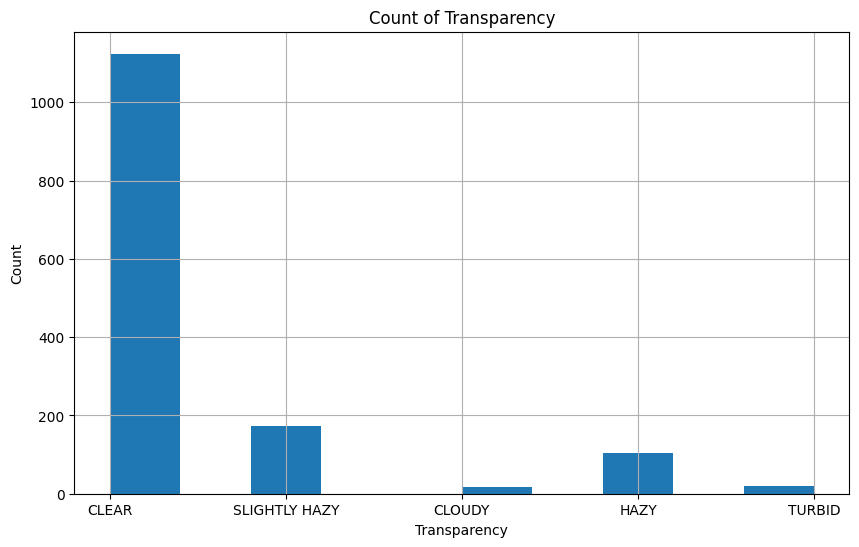

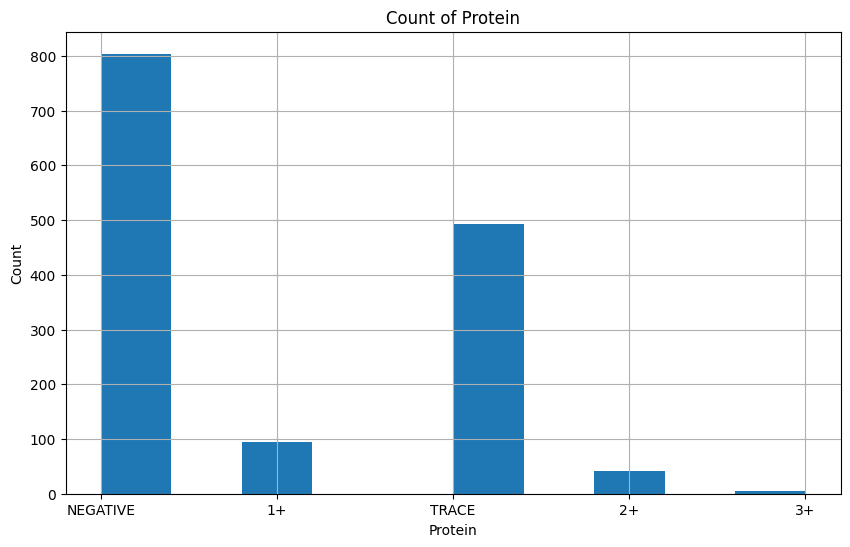

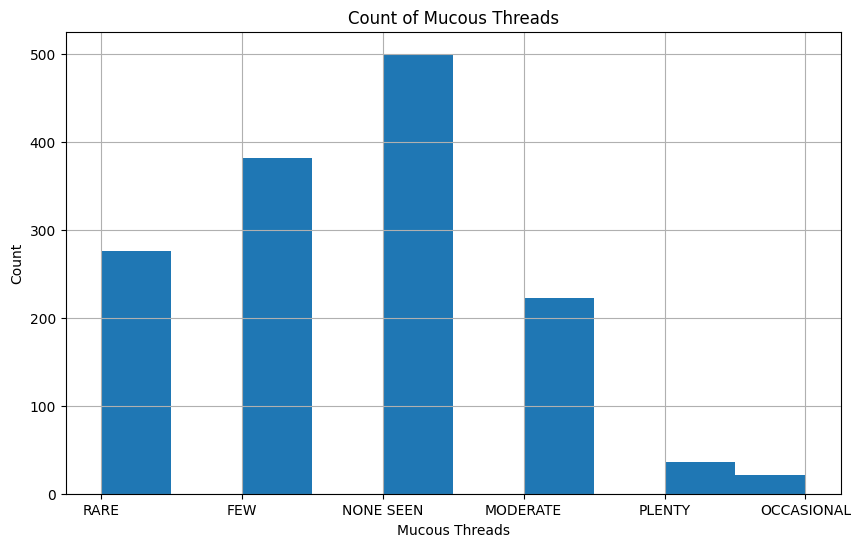

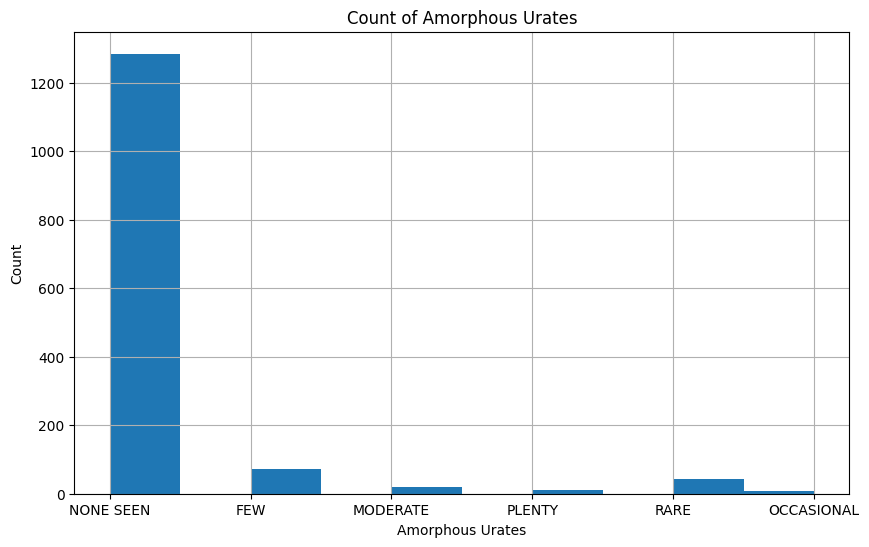

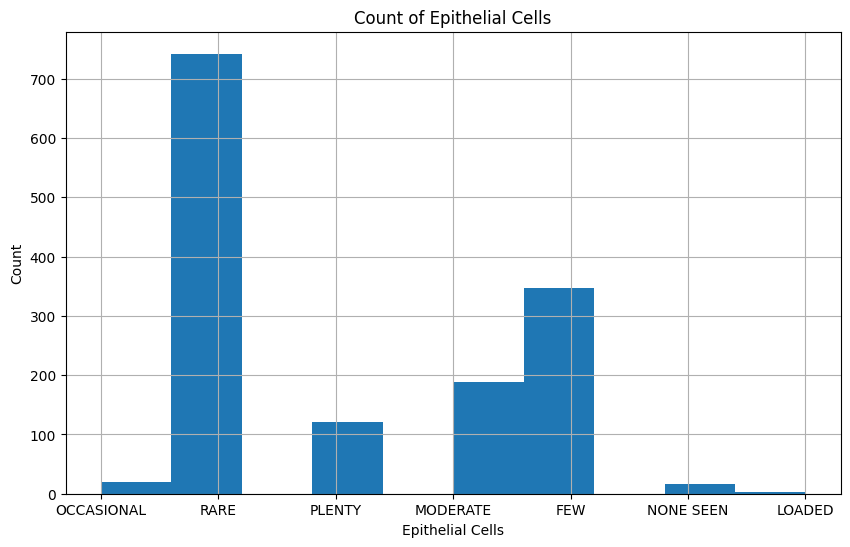

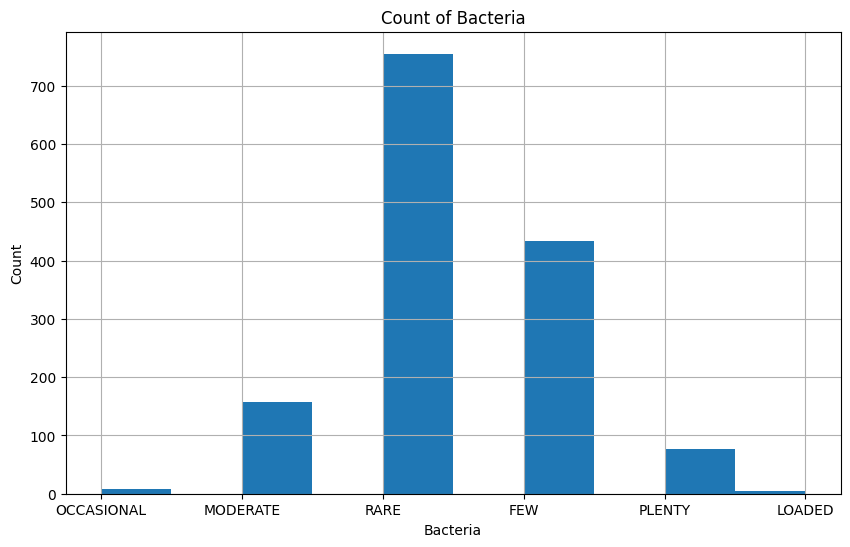

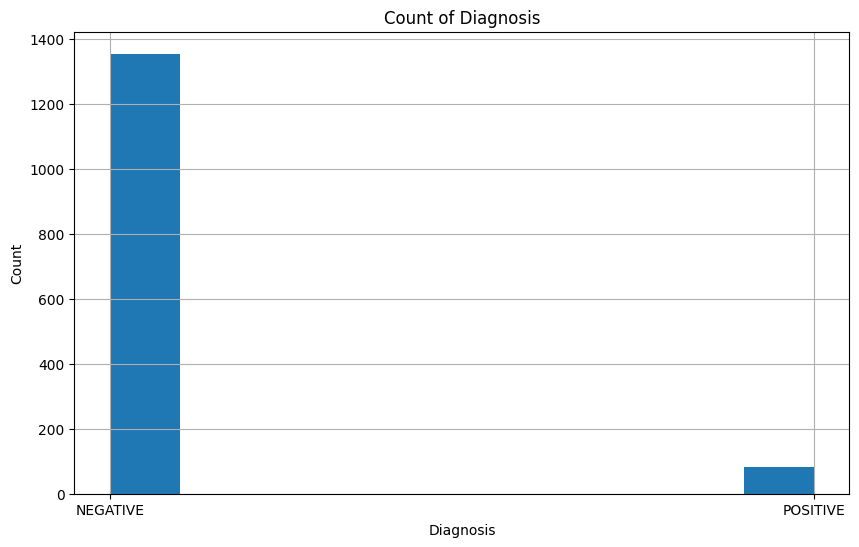

In [360]:
categorical_vars = ['Gender', 'Color', 'Transparency', 'Protein', 'Mucous Threads', 'Amorphous Urates', 'Epithelial Cells', 'Bacteria', 'Diagnosis']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    urinalysis[var].hist(bins=10, figsize=(10, 6))
    plt.title(f'Count of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

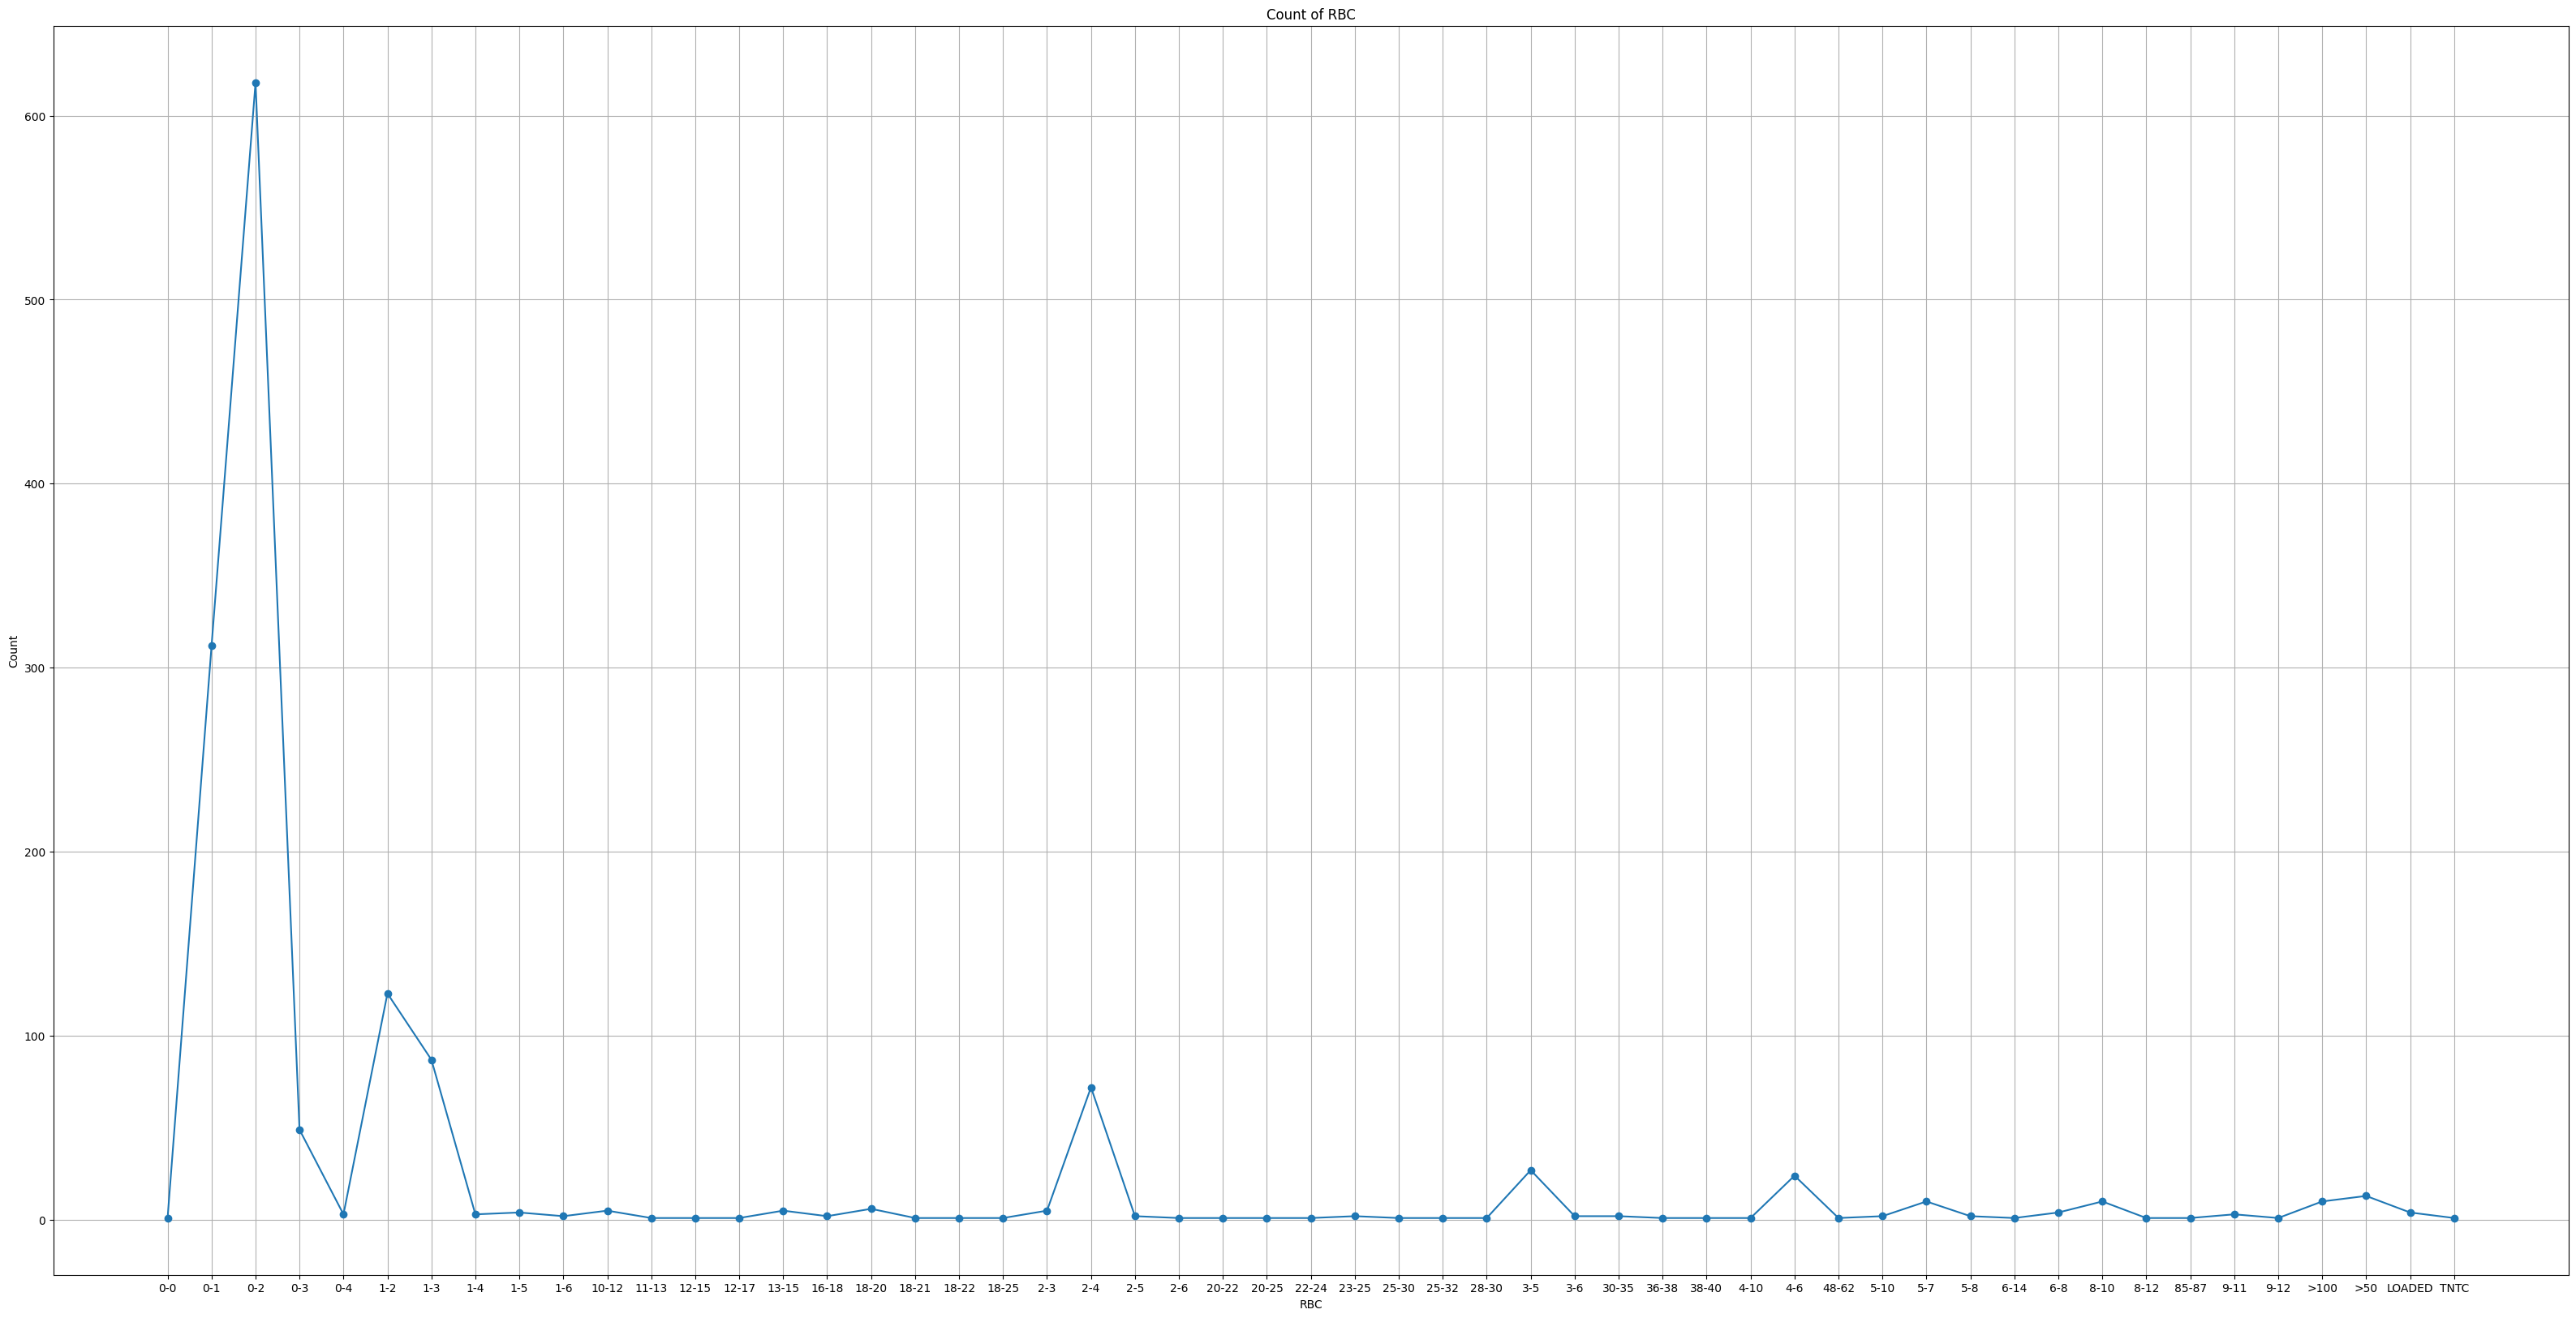

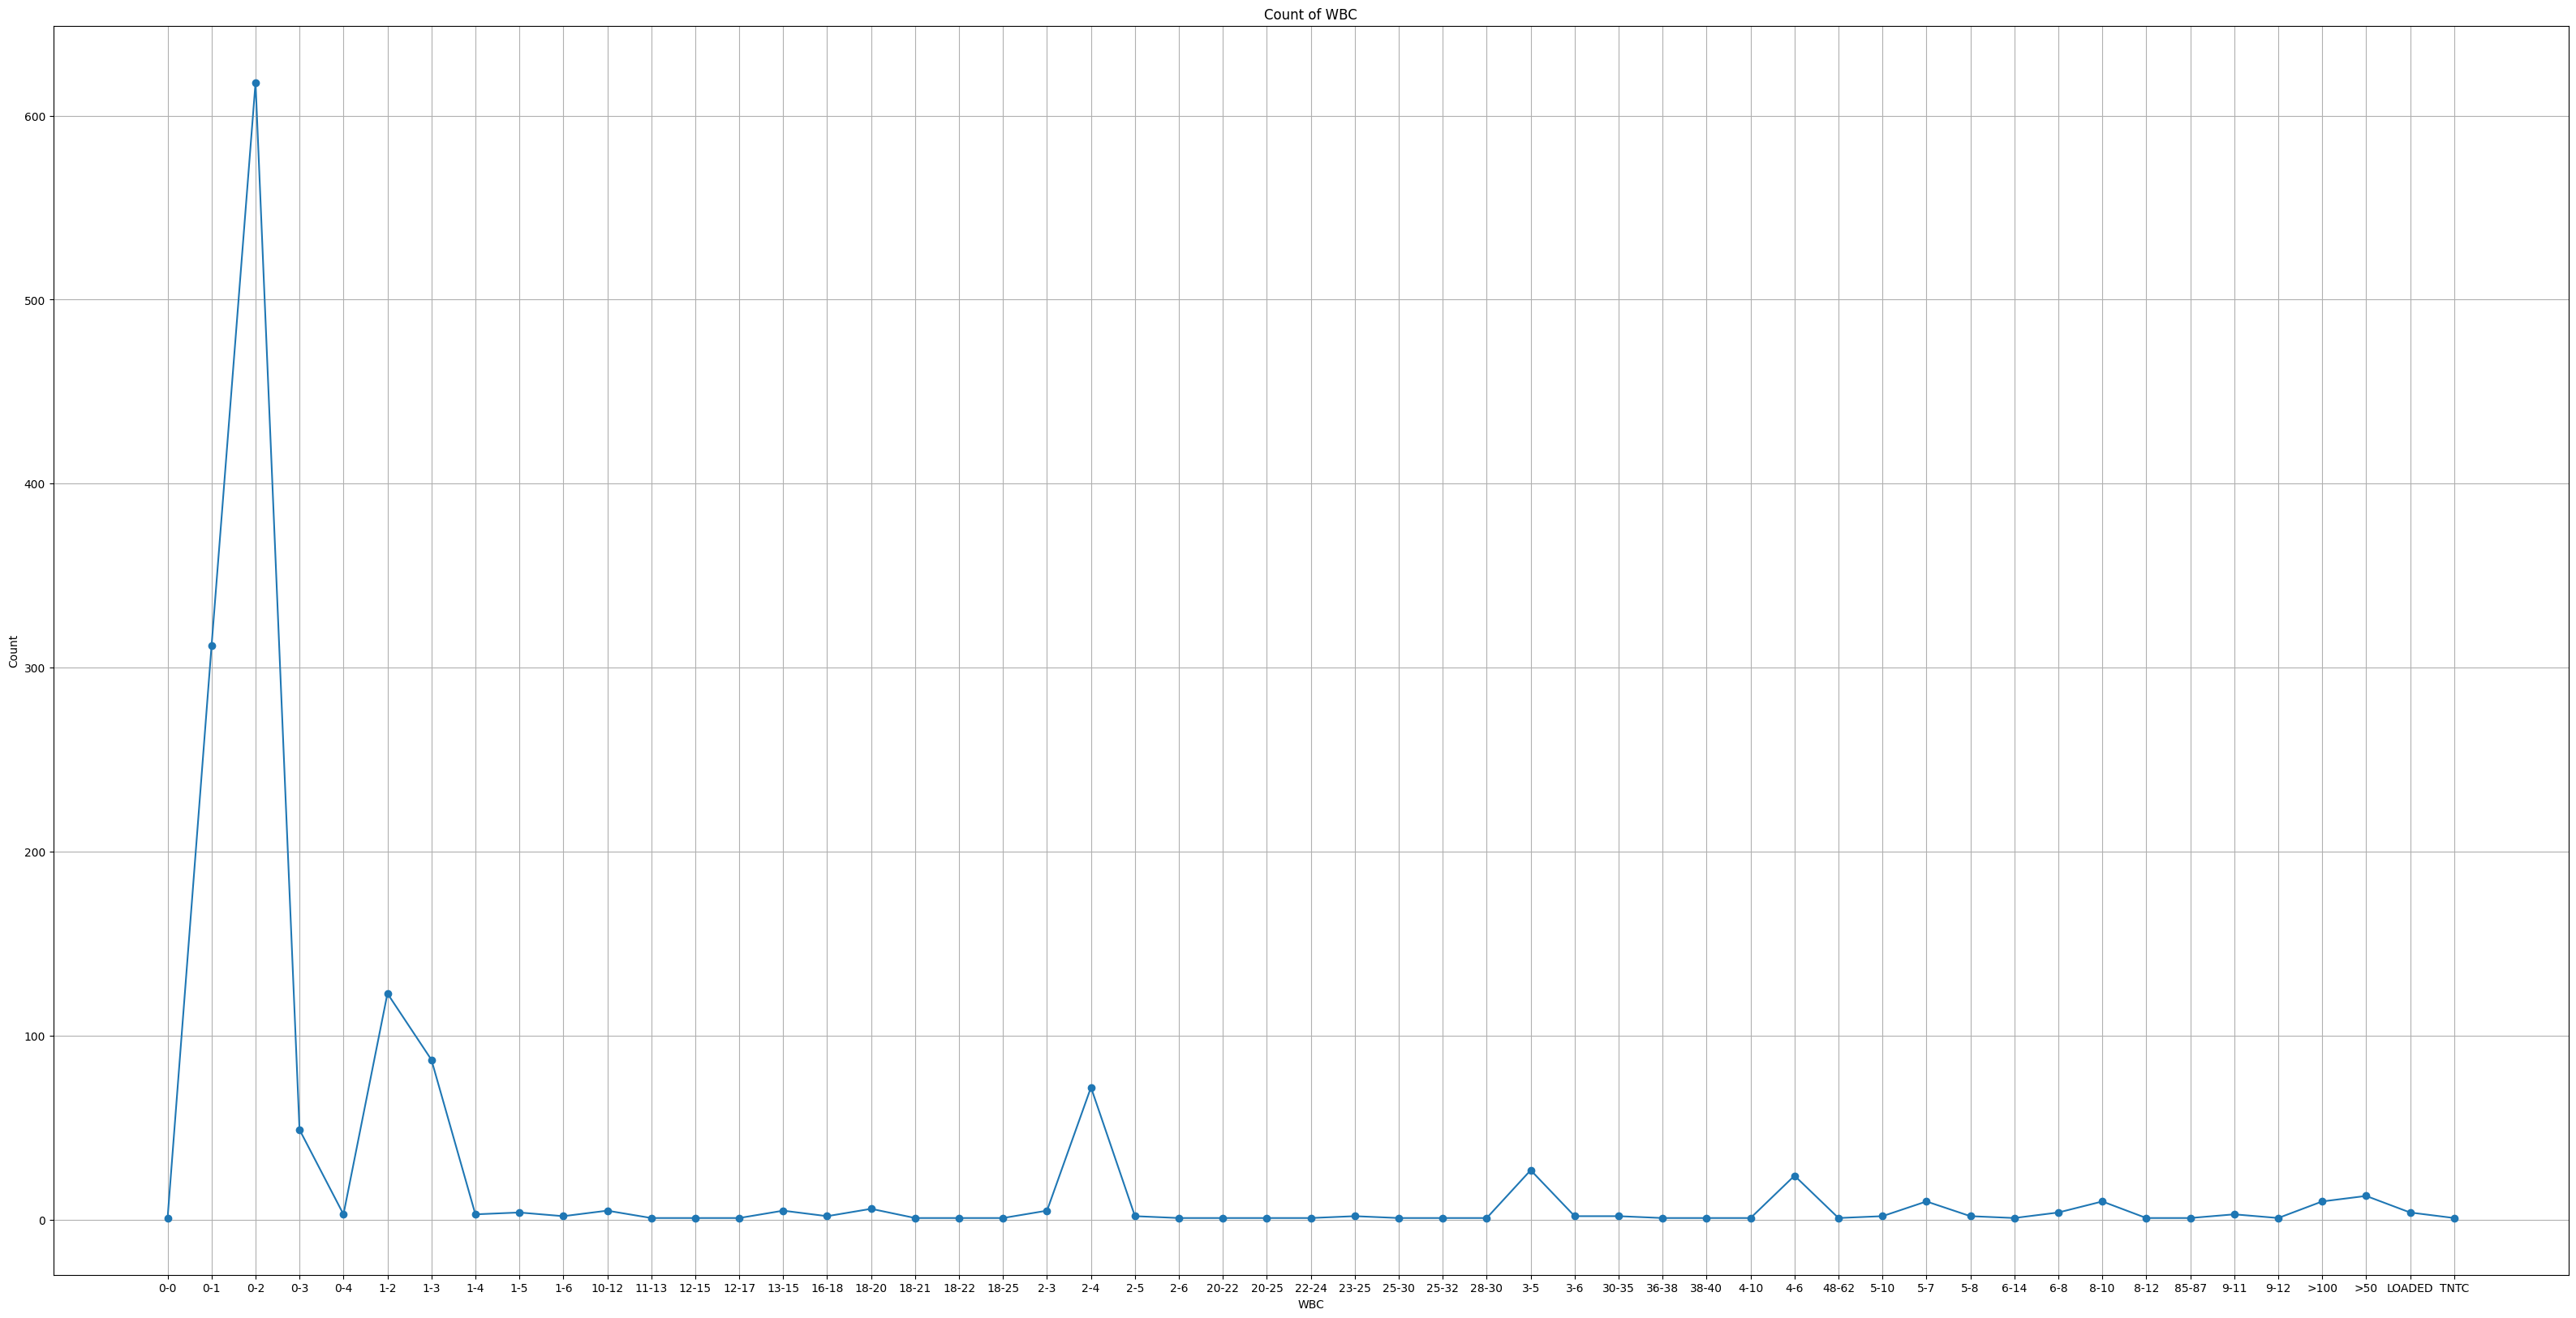

In [361]:
blood_vars = ['RBC','WBC']
rbc_counts = urinalysis['RBC'].value_counts().sort_index()

for var in blood_vars:
    plt.figure(figsize=(40, 20))
    plt.plot(rbc_counts.index, rbc_counts.values, marker='o', linestyle='-')
    plt.title(f'Count of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()


Below is a correlation matrix of the numerical columns in the dataset

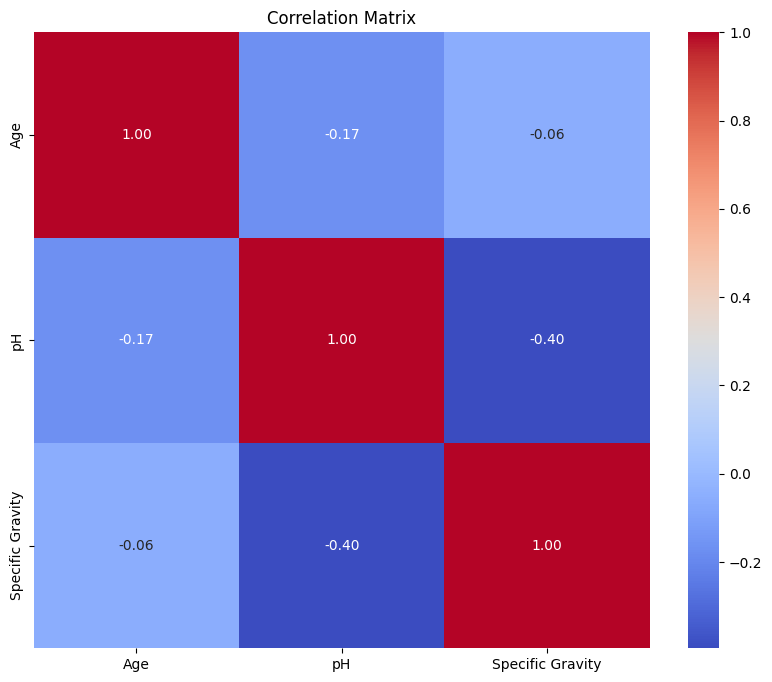

In [362]:
correlation_matrix = urinalysis[numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

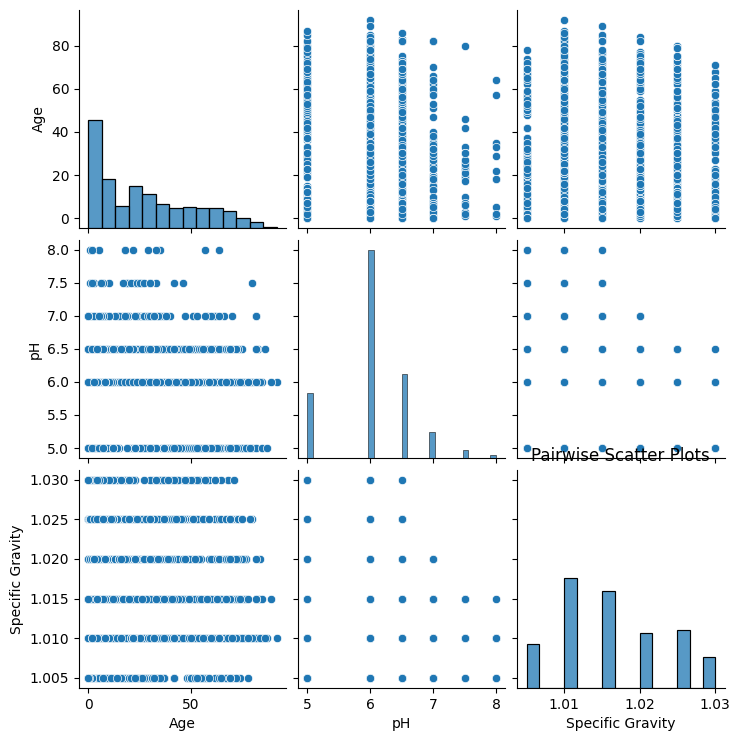

In [363]:
sns.pairplot(urinalysis[column_names[1:]])
plt.title('Pairwise Scatter Plots')
plt.show()

Below is a basic comparison of a vew of the columns in the dataset against each other to see if there could be any correlation between them. Few stand out:
* Loaded WBC to positive diagnosis
* Age to diagnosis

There can also be seen, in the data, what qualities normal urine tend to possess.

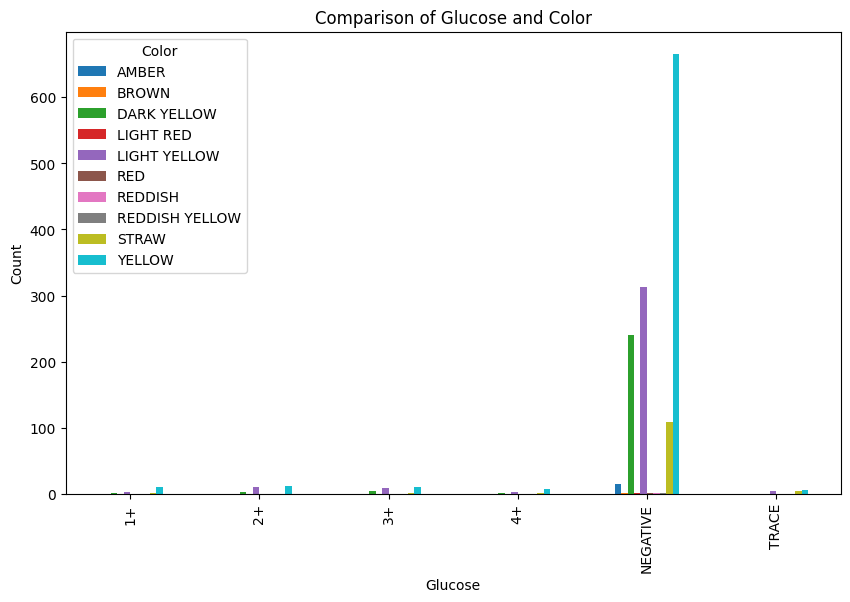

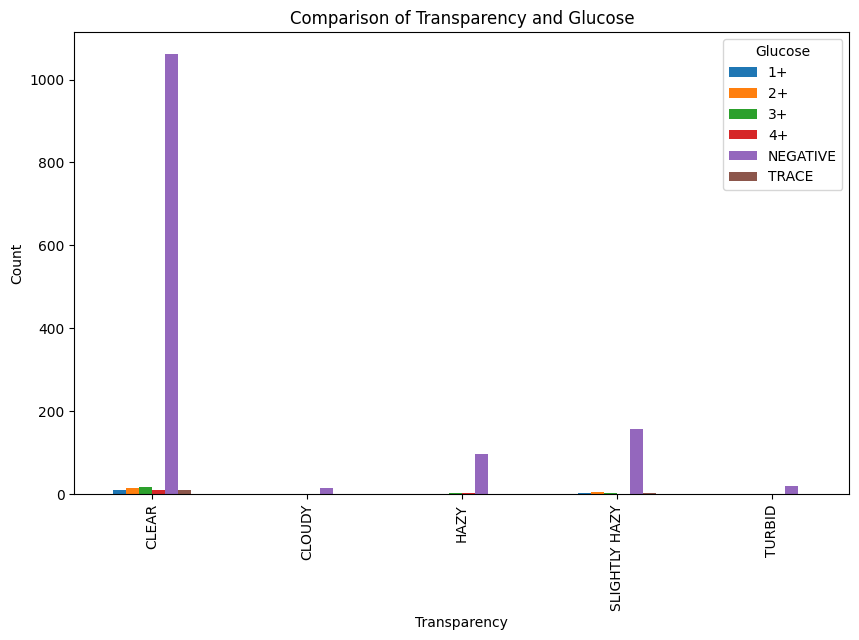

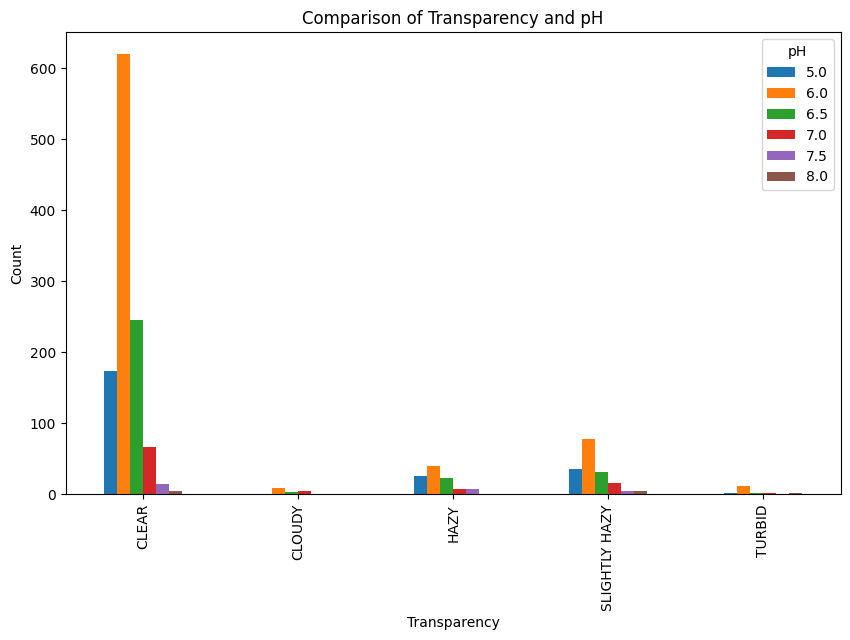

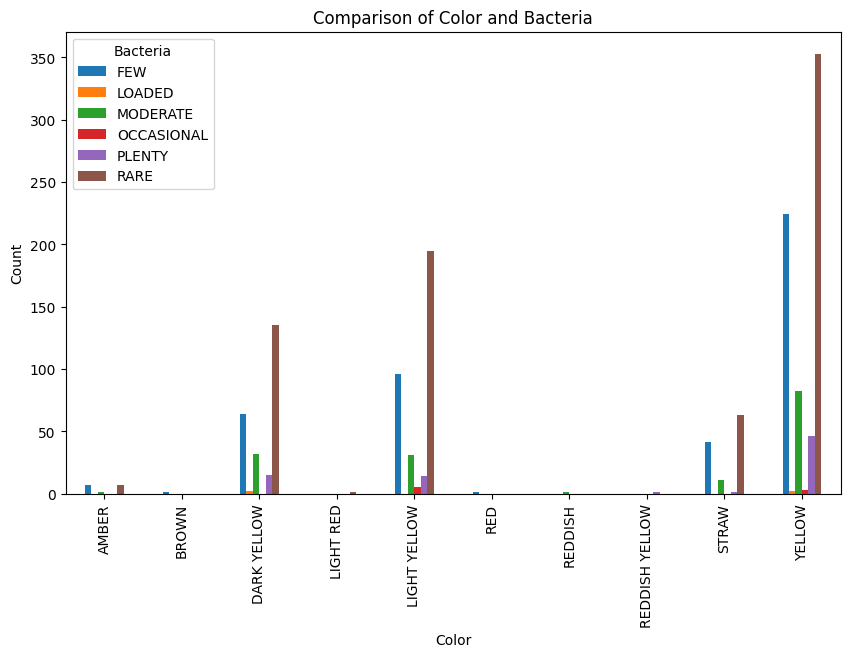

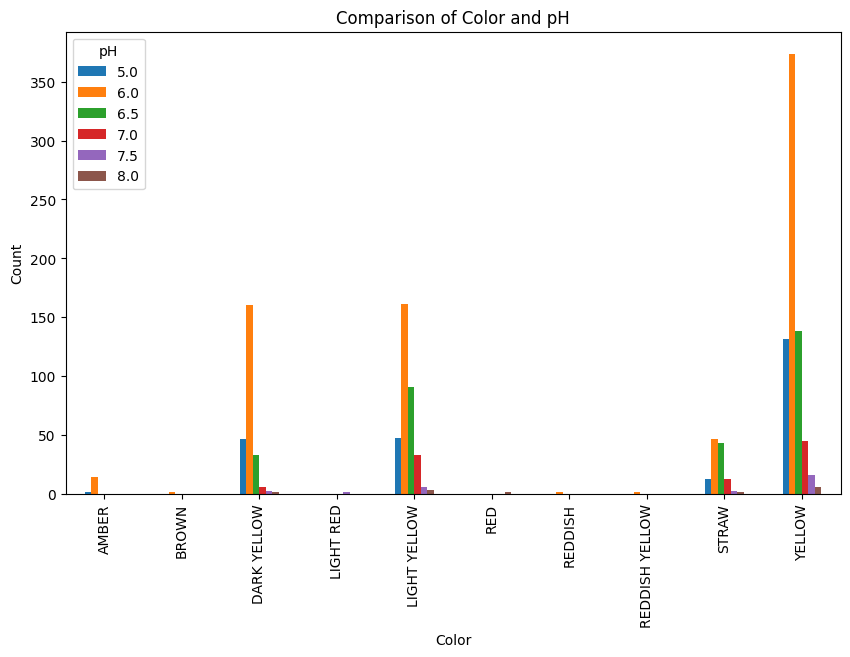

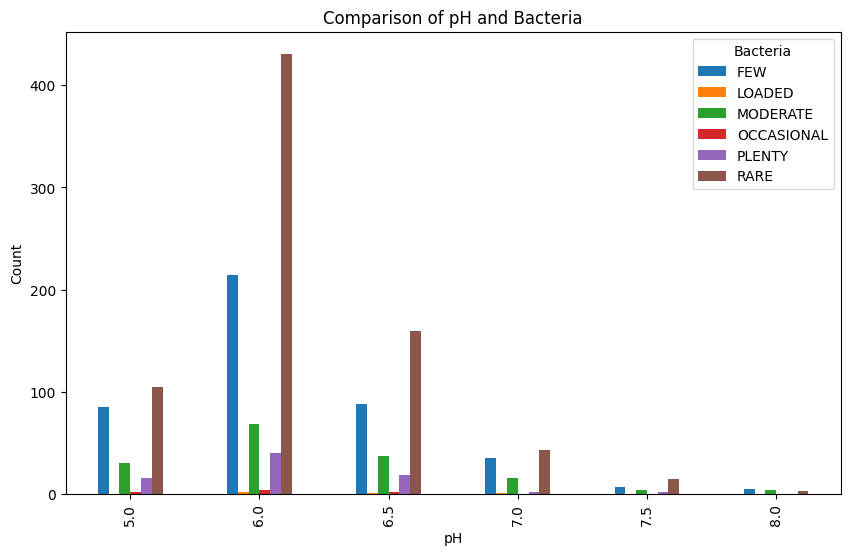

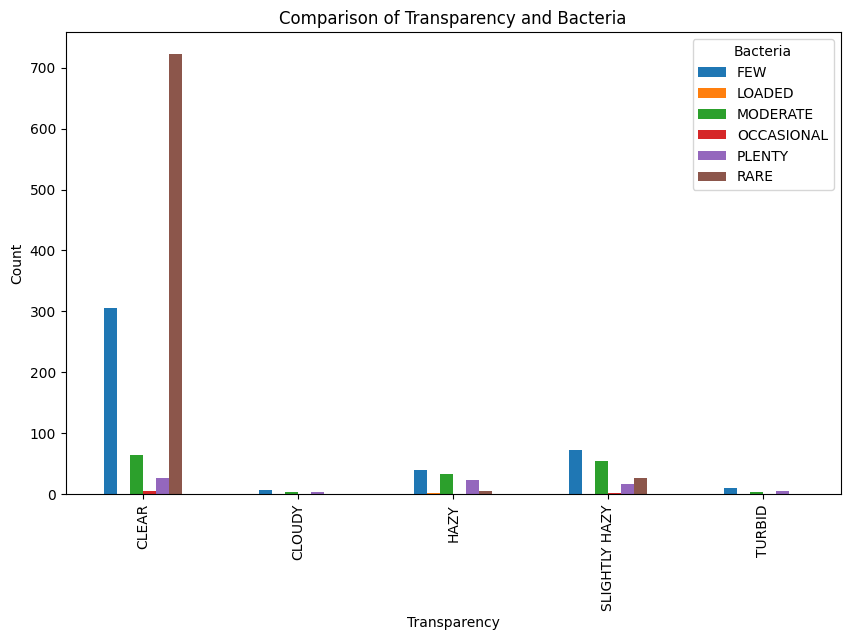

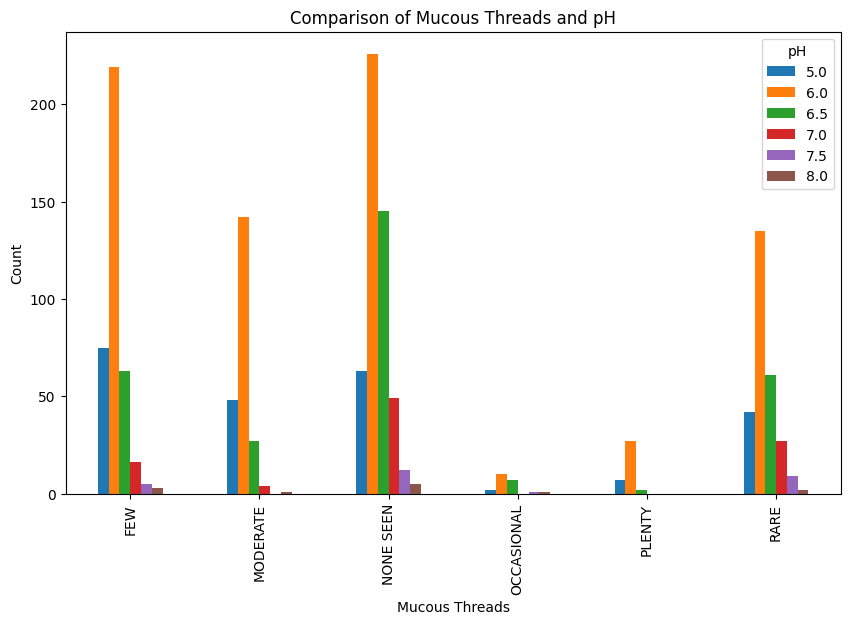

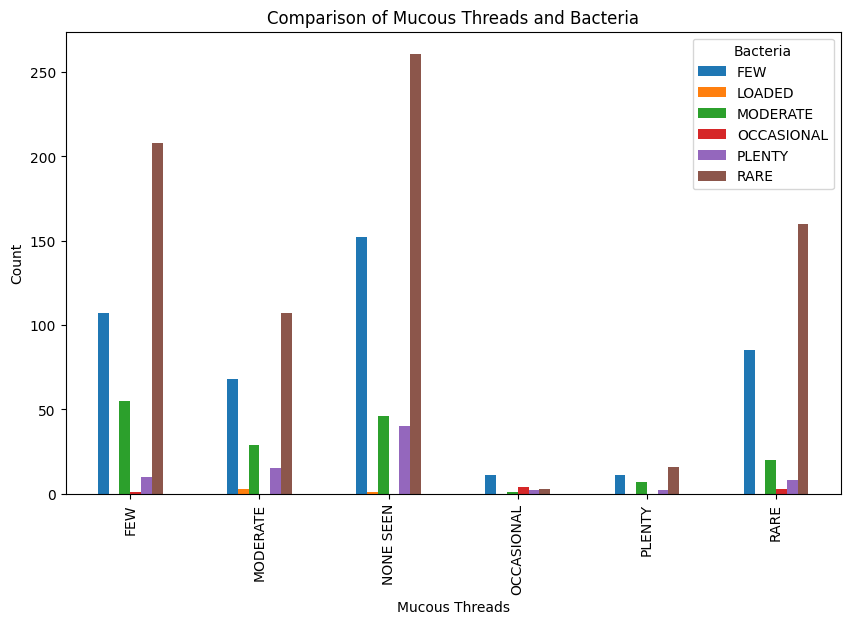

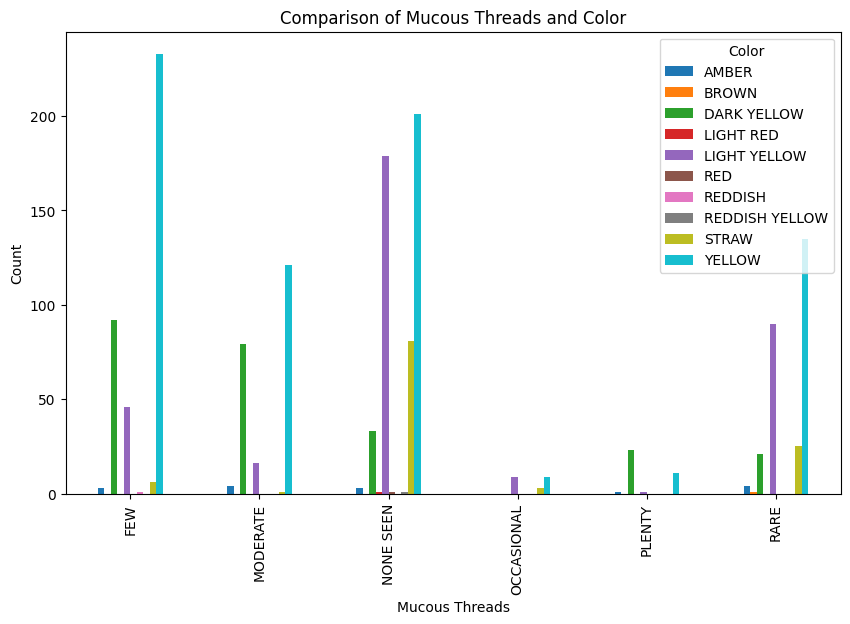

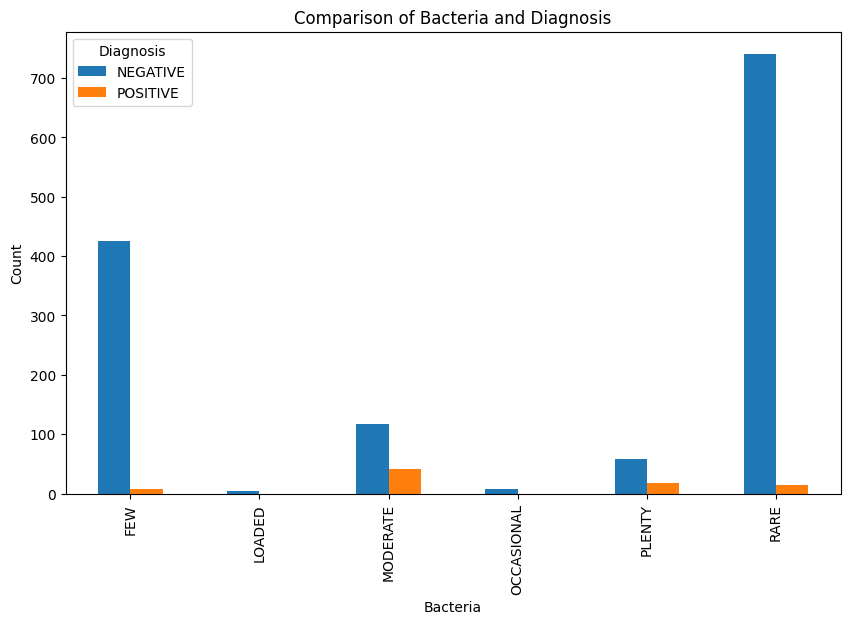

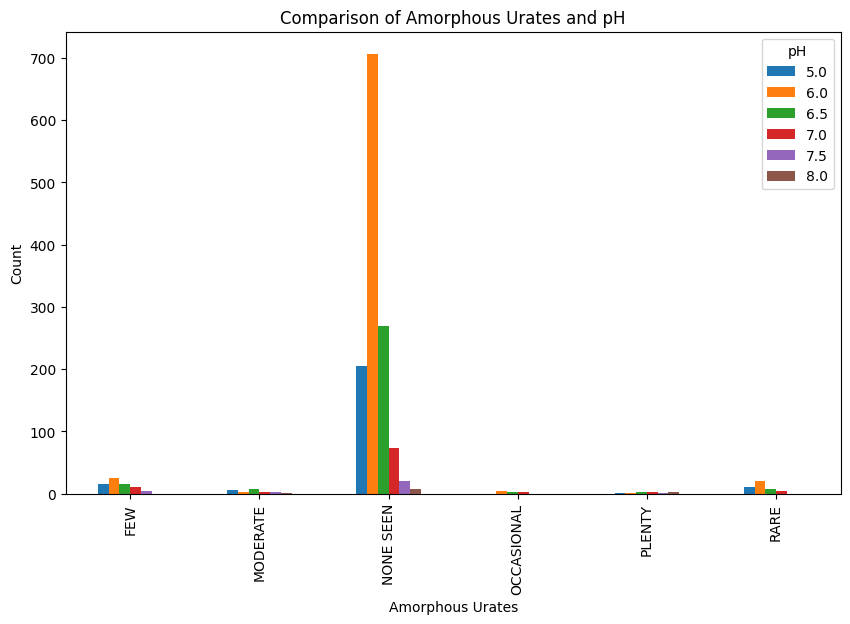

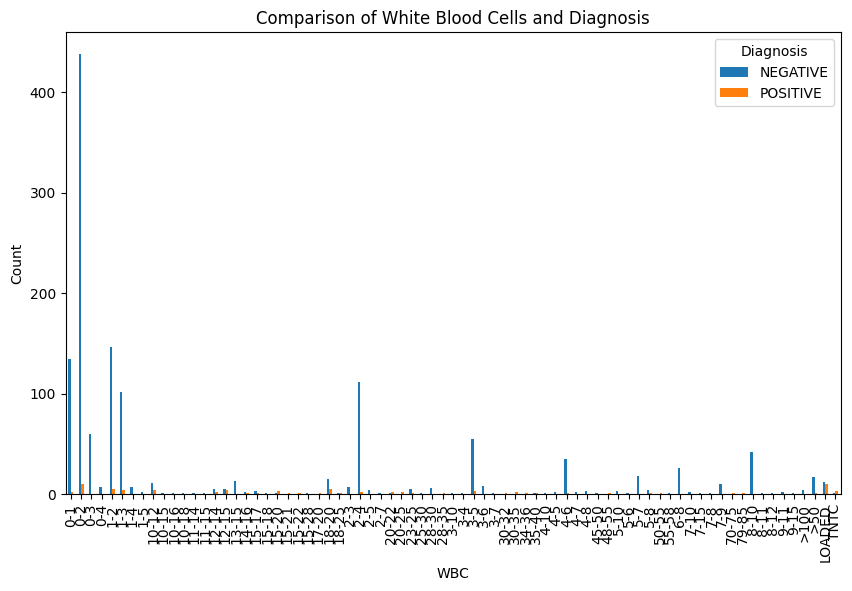

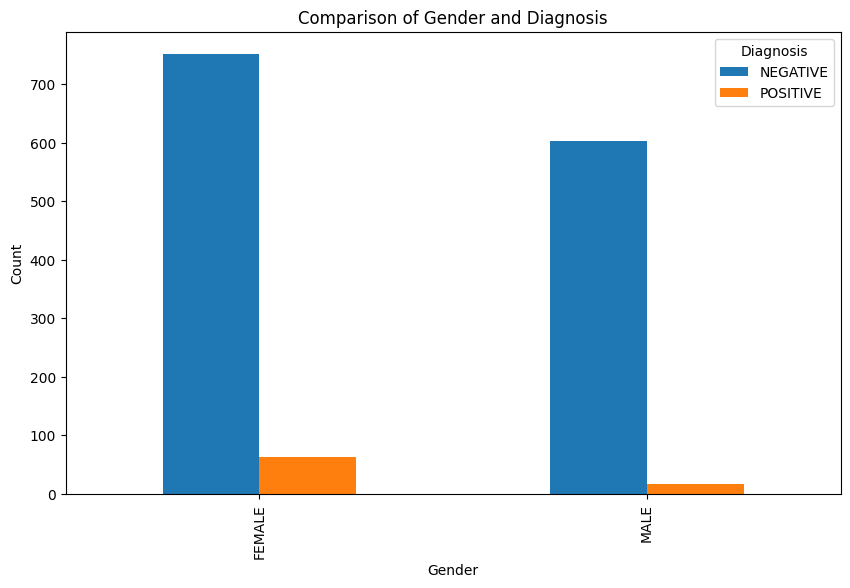

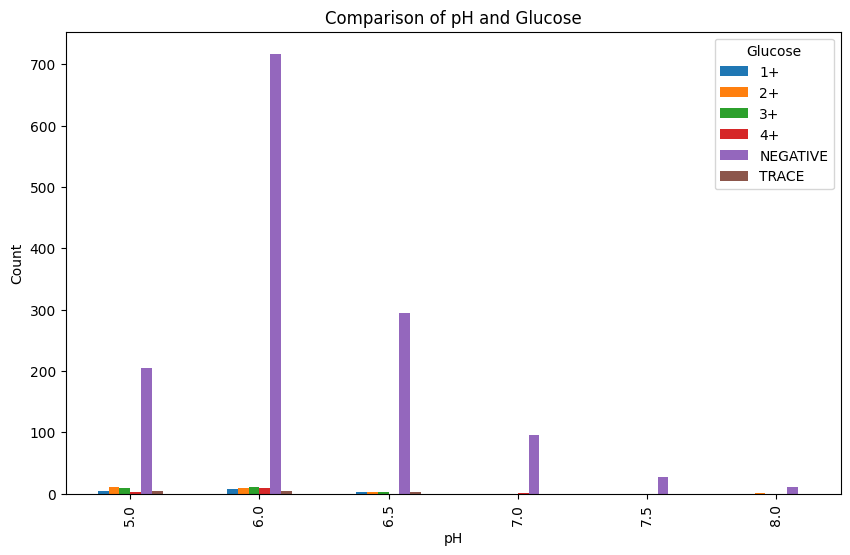

In [364]:
grouped_data = urinalysis.groupby(['Glucose', 'Color']).size().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparison of Glucose and Color')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.show()

grouped_data = urinalysis.groupby(['Transparency', 'Glucose']).size().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparison of Transparency and Glucose')
plt.xlabel('Transparency')
plt.ylabel('Count')
plt.show()

grouped_data = urinalysis.groupby(['Transparency', 'pH']).size().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparison of Transparency and pH')
plt.xlabel('Transparency')
plt.ylabel('Count')
plt.show()

grouped_data = urinalysis.groupby(['Color', 'Bacteria']).size().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparison of Color and Bacteria')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

grouped_data = urinalysis.groupby(['Color', 'pH']).size().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparison of Color and pH')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

grouped_data = urinalysis.groupby(['pH', 'Bacteria']).size().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparison of pH and Bacteria')
plt.xlabel('pH')
plt.ylabel('Count')
plt.show()

grouped_data = urinalysis.groupby(['Transparency', 'Bacteria']).size().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparison of Transparency and Bacteria')
plt.xlabel('Transparency')
plt.ylabel('Count')
plt.show()

grouped_data = urinalysis.groupby(['Mucous Threads', 'pH']).size().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparison of Mucous Threads and pH')
plt.xlabel('Mucous Threads')
plt.ylabel('Count')
plt.show()

grouped_data = urinalysis.groupby(['Mucous Threads', 'Bacteria']).size().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparison of Mucous Threads and Bacteria')
plt.xlabel('Mucous Threads')
plt.ylabel('Count')
plt.show()


grouped_data = urinalysis.groupby(['Mucous Threads', 'Color']).size().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparison of Mucous Threads and Color')
plt.xlabel('Mucous Threads')
plt.ylabel('Count')
plt.show()

grouped_data = urinalysis.groupby(['Bacteria', 'Diagnosis']).size().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparison of Bacteria and Diagnosis')
plt.xlabel('Bacteria')
plt.ylabel('Count')
plt.show()

grouped_data = urinalysis.groupby(['Amorphous Urates', 'pH']).size().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparison of Amorphous Urates and pH')
plt.xlabel('Amorphous Urates')
plt.ylabel('Count')
plt.show()

grouped_data = urinalysis.groupby(['WBC', 'Diagnosis']).size().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparison of White Blood Cells and Diagnosis')
plt.xlabel('WBC')
plt.ylabel('Count')
plt.show()

grouped_data = urinalysis.groupby(['Gender', 'Diagnosis']).size().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparison of Gender and Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

grouped_data = urinalysis.groupby(['pH', 'Glucose']).size().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Comparison of pH and Glucose')
plt.xlabel('pH')
plt.ylabel('Count')
plt.show()

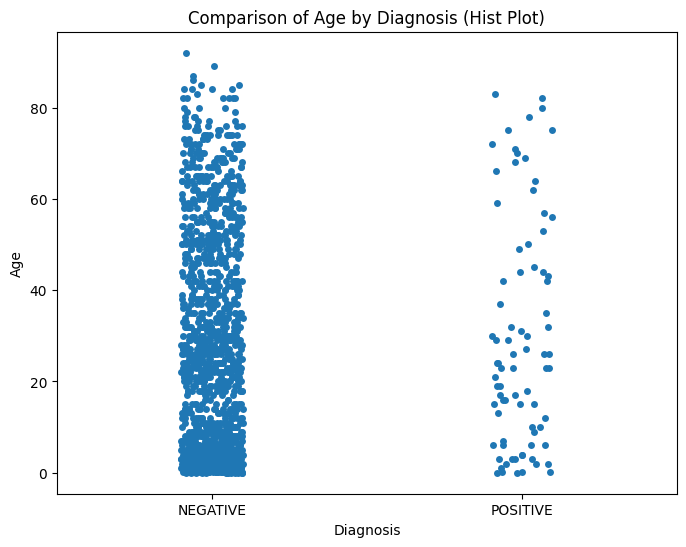

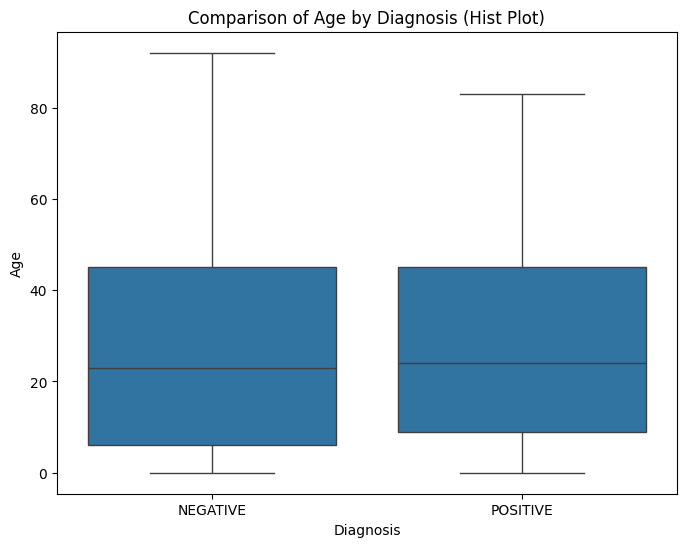

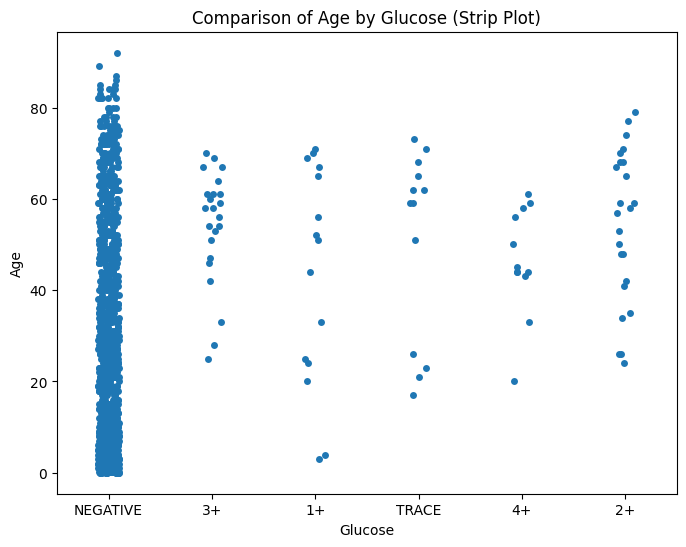

In [365]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='Diagnosis', y='Age', data=urinalysis)
plt.title('Comparison of Age by Diagnosis (Hist Plot)')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='Age', data=urinalysis)
plt.title('Comparison of Age by Diagnosis (Hist Plot)')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(8, 6))
sns.stripplot(x='Glucose', y='Age', data=urinalysis)
plt.title('Comparison of Age by Glucose (Strip Plot)')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.show()

####Section 3 - data preprocessing

Getting a look of each type of reponse for the categorical variables for encoding later. Null values are also removed from the dataset here as an aspect of preprocessing.

In [366]:
display(urinalysis['Gender'].value_counts())
display(urinalysis['Color'].value_counts())
display(urinalysis['Transparency'].value_counts())
display(urinalysis['Glucose'].value_counts())
display(urinalysis['Protein'].value_counts())
display(urinalysis['Epithelial Cells'].value_counts())
display(urinalysis['Mucous Threads'].value_counts())
display(urinalysis['Amorphous Urates'].value_counts())
display(urinalysis['Bacteria'].value_counts())

FEMALE    816
MALE      620
Name: Gender, dtype: int64

YELLOW            710
LIGHT YELLOW      341
DARK YELLOW       248
STRAW             116
AMBER              15
BROWN               1
RED                 1
REDDISH             1
REDDISH YELLOW      1
LIGHT RED           1
Name: Color, dtype: int64

CLEAR            1124
SLIGHTLY HAZY     172
HAZY              104
TURBID             20
CLOUDY             16
Name: Transparency, dtype: int64

NEGATIVE    1349
2+            24
3+            23
1+            15
TRACE         13
4+            12
Name: Glucose, dtype: int64

NEGATIVE    804
TRACE       492
1+           94
2+           41
3+            5
Name: Protein, dtype: int64

RARE          742
FEW           347
MODERATE      188
PLENTY        121
OCCASIONAL     19
NONE SEEN      16
LOADED          3
Name: Epithelial Cells, dtype: int64

NONE SEEN     500
FEW           381
RARE          276
MODERATE      222
PLENTY         36
OCCASIONAL     21
Name: Mucous Threads, dtype: int64

NONE SEEN     1284
FEW             72
RARE            42
MODERATE        19
PLENTY          11
OCCASIONAL       8
Name: Amorphous Urates, dtype: int64

RARE          755
FEW           434
MODERATE      158
PLENTY         77
OCCASIONAL      8
LOADED          4
Name: Bacteria, dtype: int64

In [367]:
print(urinalysis.isnull().sum())
urinalysis.dropna(inplace=True)
print(urinalysis.isnull().sum())

Unnamed: 0          0
Age                 0
Gender              0
Color               1
Transparency        0
Glucose             0
Protein             0
pH                  0
Specific Gravity    0
WBC                 0
RBC                 0
Epithelial Cells    0
Mucous Threads      0
Amorphous Urates    0
Bacteria            0
Diagnosis           0
dtype: int64
Unnamed: 0          0
Age                 0
Gender              0
Color               0
Transparency        0
Glucose             0
Protein             0
pH                  0
Specific Gravity    0
WBC                 0
RBC                 0
Epithelial Cells    0
Mucous Threads      0
Amorphous Urates    0
Bacteria            0
Diagnosis           0
dtype: int64


In [368]:
urinalysis['Gender'] = urinalysis['Gender'].replace({'MALE': 0, 'FEMALE': 1})
urinalysis['Color'] = urinalysis['Color'].replace({'YELLOW':0.1, 'LIGHT YELLOW':0.01, 'DARK YELLOW':0.001, 'STRAW':0.0001, 'AMBER':0.00001,'BROWN':0.000001,'RED':0.0000001, 'REDDISH':0.00000001, 'REDDISH YELLOW':0.000000001, 'LIGHT RED':0.0000000001  })
urinalysis['Transparency'] = urinalysis['Transparency'].replace({'CLEAR':0.1, 'SLIGHTLY HAZY':0.01, 'HAZY':0.001,'TURBID':0.0001,'CLOUDY':0.00001})
urinalysis['Glucose'] = urinalysis['Glucose'].replace({'NEGATIVE':0.1,'TRACE':0.01,'1+':0.001,'2+':0.0001,'3+':0.00001})
urinalysis['Protein'] = urinalysis['Protein'].replace({'NEGATIVE':0.1,'TRACE':0.01,'1+':0.001,'2+':0.0001,'3+':0.00001})
urinalysis['Epithelial Cells'] = urinalysis['Epithelial Cells'].replace({'RARE':0.1,'FEW':0.01,'MODERATE':0.001,'PLENTY':0.0001,'OCCASIONAL':0.00001,'NONE SEEN':0.000001,'LOADED':0.0000001})
urinalysis['Mucous Threads'] = urinalysis['Mucous Threads'].replace({'RARE':0.1,'FEW':0.01,'MODERATE':0.001,'PLENTY':0.0001,'OCCASIONAL':0.00001,'NONE SEEN':0.000001})
urinalysis['Amorphous Urates'] = urinalysis['Amorphous Urates'].replace({'RARE':0.1,'FEW':0.01,'MODERATE':0.001,'PLENTY':0.0001,'OCCASIONAL':0.00001,'NONE SEEN':0.000001})
urinalysis['Bacteria'] = urinalysis['Bacteria'].replace({'RARE':0.1,'FEW':0.01,'MODERATE':0.001,'PLENTY':0.0001,'OCCASIONAL':0.00001,'LOADED':0.0000001})
urinalysis['Diagnosis'] = urinalysis['Diagnosis'].replace({'NEGATIVE':0,'POSITIVE':1})
urinalysis.head()

,Unnamed: 0,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,0,76.0,1,0.010000,0.10000,0.1,0.100,5.0,1.010,1-3,0-2,0.00001,0.10,0.000001,0.00001,0
1,1,9.0,0,0.001000,0.01000,0.1,0.001,5.0,1.030,1-3,0-2,0.10000,0.01,0.010000,0.00100,0
2,2,12.0,0,0.010000,0.01000,0.1,0.010,5.0,1.030,0-3,0-2,0.10000,0.01,0.001000,0.10000,0
3,3,77.0,0,0.000001,0.00001,0.1,0.001,6.0,1.020,5-8,LOADED,0.10000,0.10,0.000001,0.01000,0
4,4,29.0,1,0.100000,0.00100,0.1,0.010,6.0,1.025,1-4,0-2,0.10000,0.10,0.000001,0.01000,0


####Section 4 and 5 - Statistical Analysis and Visualisation

The significance level chosen will be 0.05

First, the relationship between gender and diagnosis will be explored

In [369]:
contingency_table = pd.crosstab(urinalysis['Gender'], urinalysis['Diagnosis'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 16.323221066043086
p-value: 5.340549764782603e-05


It Seeems to indicate that there is some relation between the two. Now let's delve deeper as to whether the individual gender matters when it comes to a diagnosis.

In [370]:
contingency_male = pd.crosstab(urinalysis[urinalysis['Gender'] == 0]['Diagnosis'], urinalysis[urinalysis['Gender'] == 0]['Diagnosis'])
contingency_female = pd.crosstab(urinalysis[urinalysis['Gender'] == 1]['Diagnosis'], urinalysis[urinalysis['Gender'] == 1]['Diagnosis'])
chi2_male, p_male, _, _ = chi2_contingency(contingency_male)
chi2_female, p_female, _, _ = chi2_contingency(contingency_female)

print("For MALE:")
print("Chi-square statistic:", chi2_male)
print("p-value:", p_male)
print("For FEMALE:")
print("Chi-square statistic:", chi2_female)
print("p-value:", p_female)

For MALE:
Chi-square statistic: 583.0682188073408
p-value: 8.066473278294306e-129
For FEMALE:
Chi-square statistic: 801.2389884824726
p-value: 2.9019036242644454e-176


Both the male and female groups have relatively large chi-square statistics, indicating a notable association between gender and diagnosis within each gender group.

The extremely small p-values for both groups (essentially 0) indicate that the observed association between gender and diagnosis within each gender group is highly unlikely to have occurred by chance alone.

These results suggest that there is a strong and significant association between gender and diagnosis.

We will now see if there is a pattern between diagnosis and age, and see how gender influences things.

In [371]:
regression_model = ols('Diagnosis ~ Age', data=urinalysis).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Diagnosis   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.202
Date:                Wed, 28 Feb 2024   Prob (F-statistic):              0.273
Time:                        03:44:37   Log-Likelihood:                 68.546
No. Observations:                1435   AIC:                            -133.1
Df Residuals:                    1433   BIC:                            -122.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0487      0.009      5.217      0.0

The R-squared value is very low, approximately 0.1%, indicating that only a very small amount of the variance in diagnosis is explained by age.

A low F-statistic and a high p-value suggest that the model does not provide a better fit to the data than a model with no predictors. In this case, the F-statistic is 1.202 with a p-value of 0.273, indicating that the model is not statistically significant.

The p-value associated with age is 0.273, which is greater than the typical significance level of 0.05, indicating that the coefficient for age is not statistically significant.

The regression model does not provide a good fit to the data, as indicated by the low R-squared value and the lack of statistical significance for the coefficient of age. This suggests that age may not be a significant predictor of diagnosis in this model.

In [372]:
model = ols('Diagnosis ~ Age * Gender', data=urinalysis).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Diagnosis   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     6.794
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           0.000151
Time:                        03:44:37   Log-Likelihood:                 78.092
No. Observations:                1435   AIC:                            -148.2
Df Residuals:                    1431   BIC:                            -127.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0342      0.013      2.603      0.0

the regression model does not appear to provide a good fit to the data, as indicated by the low R-squared value and the lack of statistically significant coefficients. It seems that gender does not influence age when it comes to diagnosis

In [373]:
contingency_table = pd.crosstab(urinalysis['WBC'], urinalysis['Diagnosis'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 511.94978342308957
p-value: 1.0509734661305238e-66


In [374]:
X = pd.get_dummies(urinalysis['WBC'], drop_first=True)
y = (urinalysis['Diagnosis'] == 1).astype(int)
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

         Current function value: 0.133529
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 1435
Model:                          Logit   Df Residuals:                     1360
Method:                           MLE   Df Model:                           74
Date:                Wed, 28 Feb 2024   Pseudo R-squ.:                  0.3849
Time:                        03:44:37   Log-Likelihood:                -191.61
converged:                      False   LL-Null:                       -311.50
Covariance Type:            nonrobust   LLR p-value:                 2.247e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2047      0.712     -5.902      0.000      -5.601      -2.808
0-2            0.4251      0.781      0.544      0.586      -1.10

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In the logistic regression results, the coefficient for the LOADED category is 4.0224 with a standard error of 0.831. This indicates that being classified as "LOADED" is associated with an estimated increase of approximately 4.0224 units in the log-odds of a positive diagnosis.

The p-value associated with the LOADED coefficient is less than 0.001 (stated as "0.000" in the output), indicating that this coefficient is statistically significant. This suggests that the classification of LOADED as a WBC category is associated with a significantly higher likelihood of a positive diagnosis compared to the reference category.

Based on this logistic regression model, being classified as "LOADED" in terms of WBC count is strongly associated with an increased likelihood of a positive diagnosis.


In [375]:
contingency_table = pd.crosstab(urinalysis['Diagnosis'], urinalysis['Transparency'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

Chi-square statistic: 113.47553230359212
p-value: 1.3199613719554408e-23


I will see the correlation between positive diagnosis and urine that doesn't have a clear transparency

In [376]:
contingency_table = pd.crosstab(urinalysis['Transparency'] != 0.100000, urinalysis['Diagnosis']==1)
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

Chi-square statistic: 88.31436228162043
p-value: 5.58365648390842e-21


With such a small p-value and a significant chi-square statistic, I can conclude that there is a significant association between the positve diagnosis and the transparency of the urine being compared.

Now let us see if there is a relation between the pH of the urine and the bacteria found within it

In [377]:
contingency_table = pd.crosstab(urinalysis['pH'], urinalysis['Bacteria'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

Chi-square statistic: 32.80339036803194
p-value: 0.13605706165094333


The p-value (0.136) is greater than the chosen significance level (0.05) Therefore, based on this analysis, there is not sufficient evidence to conclude that there is a significant association between the pH of the urine and the presence of bacteria.


Now let us see if there is a relation between the pH of the urine and the diagnosis

In [378]:
contingency_table = pd.crosstab(urinalysis['pH'], urinalysis['Diagnosis'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

Chi-square statistic: 0.9554084654404602
p-value: 0.9660816101519033


The p-value (0.966) is much greater than the common significance level of 0.05. This suggests that there is insufficient evidence to conclude that there is a significant association between the pH of the urine and the diagnosis of the patients.

Now let us see if there is a relation between the bacteria of the urine and the diagnosis

In [379]:
contingency_table = pd.crosstab(urinalysis['Bacteria'], urinalysis['Diagnosis'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

Chi-square statistic: 200.56986810146384
p-value: 2.145376021279956e-41


The p-value is extremely small (close to zero), much smaller than the common significance level of 0.05. This suggests that there is strong evidence to conclude that there is a significant association between the presence of bacteria in the urine and the diagnosis of the patients.

Now let us see if there is a relation between the amorphous urates of the urine and the pH

In [380]:
contingency_table = pd.crosstab(urinalysis['pH'], urinalysis['Amorphous Urates'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

Chi-square statistic: 161.47687615549165
p-value: 6.261347378888394e-22


The p-value is extremely small (close to zero), much smaller than the common significance level of 0.05. This suggests that there is strong evidence to conclude that there is a significant association between the presence of amorphous urates in the urine and the pH of the urine

Now let us see if there is a relation between the amorphous urates of the urine and the diagnosis

In [381]:
contingency_table = pd.crosstab(urinalysis['Diagnosis'], urinalysis['Amorphous Urates'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

Chi-square statistic: 15.114269431831826
p-value: 0.009885079675126014


the p-value is 0.00988, which is smaller than the common significance level of 0.05. This suggests that there is significant evidence to conclude that there is an association between the presence of amorphous urates in the urine and the diagnosis of the patients.

Now let us see if there is a relation between the protein in the urine and the diagnosis

In [382]:
contingency_table = pd.crosstab(urinalysis['Protein'], urinalysis['Diagnosis'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

Chi-square statistic: 19.350484099611553
p-value: 0.0006706153619044564


the p-value is 0.00067, which is smaller than the common significance level of 0.05. This suggests that there is some evidence to conclude that there is an association between the presence of protein in the urine and the diagnosis of the patients.

Now let us see if there is a relation between the epithelial cells of the urine and the diagnosis

In [383]:
contingency_table = pd.crosstab(urinalysis['Epithelial Cells'], urinalysis['Diagnosis'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

Chi-square statistic: 26.128541309797836
p-value: 0.0002106948069322982


the p-value is 0.00021, which is smaller than the common significance level of 0.05. This suggests that there is some evidence to conclude that there is an association between the presence of epithelial cells in the urine and the diagnosis of the patients.

Now let us see if there is a relation between the mucous threads of the urine and the diagnosis

In [384]:
contingency_table = pd.crosstab(urinalysis['Mucous Threads'], urinalysis['Diagnosis'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

Chi-square statistic: 3.3843894961205176
p-value: 0.6409485186884808




the p-value is 0.6409, which is larger than the common significance level of 0.05. This suggests that there is NO significant evidence to conclude that there is an association between the presence of protein in the urine and the diagnosis of the patients.


In [385]:
positive_diagnosis_age = urinalysis[urinalysis['Diagnosis'] == 1]['Age']
negative_diagnosis_age = urinalysis[urinalysis['Diagnosis'] == 0]['Age']

t_stat, p_value = ttest_ind(positive_diagnosis_age, negative_diagnosis_age)
print("T-test result for Age and Diagnosis:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-test result for Age and Diagnosis:
T-statistic: 1.0965208169791325
P-value: 0.2730351526181278


The results suggest that there isn't sufficient evidence to conclude that there is a significant difference in age between the diagnostic groups, based on the given data and the chosen significance level.

Next, we will calculate some confidence intervals to estimate population values

In [386]:
mean_age = urinalysis['Age'].mean()
std_error_age = urinalysis['Age'].std() / np.sqrt(len(urinalysis))
conf_int_age = stats.t.interval(0.95, len(urinalysis)-1, loc=mean_age, scale=std_error_age)

print("Confidence Interval for Mean Age:", conf_int_age)

positive_diagnosis_count = urinalysis[urinalysis['Diagnosis'] == 1].shape[0]
total_patients = len(urinalysis)
proportion_positive = positive_diagnosis_count / total_patients
conf_int_positive = stats.norm.interval(0.95, loc=proportion_positive, scale=np.sqrt((proportion_positive*(1-proportion_positive))/total_patients))

print("Confidence Interval for Proportion of Positive Diagnosis:", conf_int_positive)

female_count = urinalysis[urinalysis['Gender'] == 1].shape[0]
proportion_female = female_count / total_patients
conf_int_gender = stats.norm.interval(0.95, loc=proportion_female, scale=np.sqrt((proportion_female*(1-proportion_female))/total_patients))

print("Confidence Interval for Proportion of Female Patients:", conf_int_gender)

male_count = urinalysis[urinalysis['Gender'] == 0].shape[0]
proportion_male = male_count / total_patients
conf_int_gender = stats.norm.interval(0.95, loc=proportion_male, scale=np.sqrt((proportion_male*(1-proportion_male))/total_patients))

print("Confidence Interval for Proportion of Male Patients:", conf_int_gender)

mean_ph = urinalysis['pH'].mean()
std_error_ph = urinalysis['pH'].std() / np.sqrt(len(urinalysis))
conf_int_ph = stats.t.interval(0.95, len(urinalysis)-1, loc=mean_ph, scale=std_error_ph)

print("Confidence Interval for Mean pH Level:", conf_int_ph)

mean_specific_gravity = urinalysis['Specific Gravity'].mean()
std_error_specific_gravity = urinalysis['Specific Gravity'].std() / np.sqrt(len(urinalysis))
conf_int_specific_gravity = stats.t.interval(0.95, len(urinalysis)-1, loc=mean_specific_gravity, scale=std_error_specific_gravity)

print("Confidence Interval for Mean Specific Gravity:", conf_int_specific_gravity)

bacteria_count = urinalysis[urinalysis['Bacteria']!=0.1].shape[0]
proportion_bacteria = bacteria_count / total_patients
conf_int_bacteria = stats.norm.interval(0.95, loc=proportion_bacteria, scale=np.sqrt((proportion_bacteria*(1-proportion_bacteria))/total_patients))

print("Confidence Interval for Proportion of Patients with Bacteria more than RARE in Urine:", conf_int_bacteria)



Confidence Interval for Mean Age: (25.99874360862572, 28.4291309558342)
Confidence Interval for Proportion of Positive Diagnosis: (0.044505504906559495, 0.06838648115615828)
Confidence Interval for Proportion of Female Patients: (0.5423144702682079, 0.5935740314739524)
Confidence Interval for Proportion of Male Patients: (0.40642596852604757, 0.45768552973179216)
Confidence Interval for Mean pH Level: (6.0219599916687665, 6.0839633532789685)
Confidence Interval for Mean Specific Gravity: (1.0154693448936012, 1.0162240348973395)
Confidence Interval for Proportion of Patients with Bacteria more than RARE in Urine: (0.4487282105228599, 0.5004007093377673)


In [387]:
conf_intervals = {
    'Mean Age': (25.99874360862572, 28.4291309558342),
    'Proportion of Positive Diagnosis': (0.044505504906559495, 0.06838648115615828),
    'Proportion of Female Patients': (0.5423144702682079, 0.5935740314739524),
    'Proportion of Male Patients': (0.40642596852604757, 0.45768552973179216),
    'Mean pH Level': (6.0219599916687665, 6.0839633532789685),
    'Mean Specific Gravity': (1.0154693448936012, 1.0162240348973395),
    'Proportion of Patients with Bacteria more than RARE in Urine': (0.4487282105228599, 0.5004007093377673)
}

sample_size = 1434

estimated_population_values = {}

for key, interval in conf_intervals.items():
    lower_bound, upper_bound = interval
    estimated_population_values[key] = (lower_bound + upper_bound) / 2

for key, value in estimated_population_values.items():
    print(f"Estimated population {key}: {value}")


Estimated population Mean Age: 27.21393728222996
Estimated population Proportion of Positive Diagnosis: 0.05644599303135889
Estimated population Proportion of Female Patients: 0.5679442508710801
Estimated population Proportion of Male Patients: 0.43205574912891986
Estimated population Mean pH Level: 6.0529616724738675
Estimated population Mean Specific Gravity: 1.0158466898954703
Estimated population Proportion of Patients with Bacteria more than RARE in Urine: 0.4745644599303136


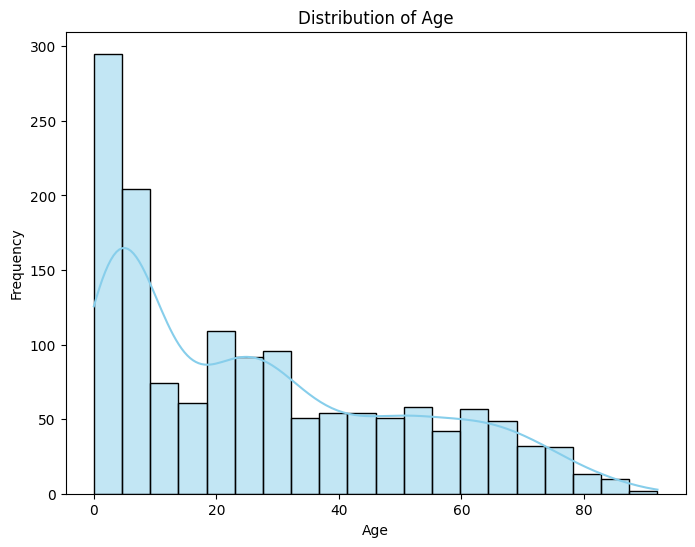

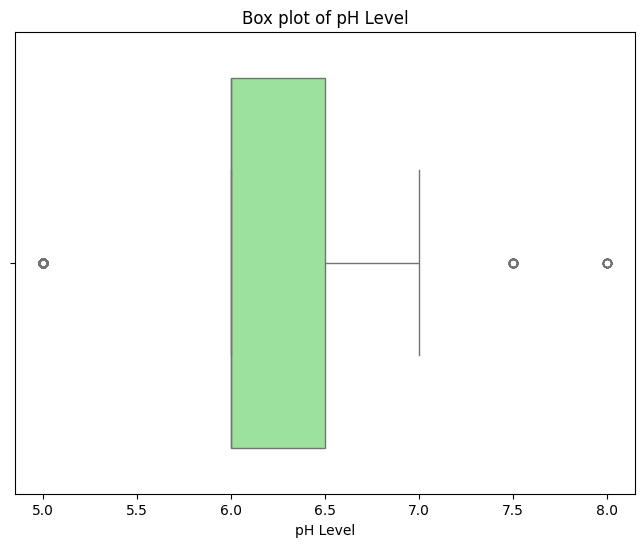

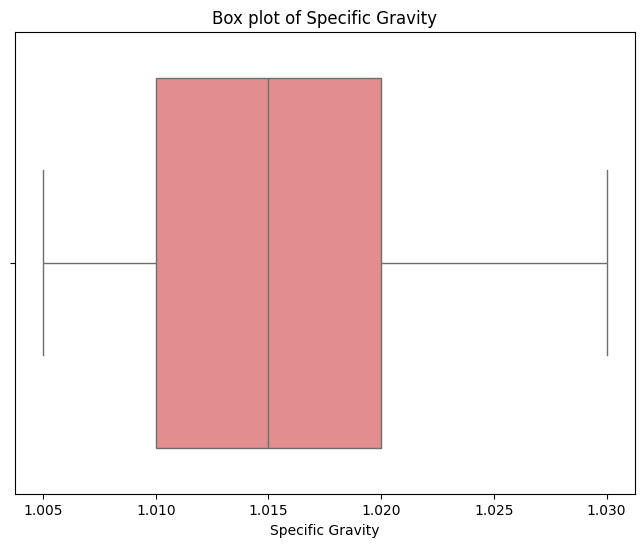

In [388]:
plt.figure(figsize=(8, 6))
sns.histplot(urinalysis['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='pH', data=urinalysis, color='lightgreen')
plt.title('Box plot of pH Level')
plt.xlabel('pH Level')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Specific Gravity', data=urinalysis, color='lightcoral')
plt.title('Box plot of Specific Gravity')
plt.xlabel('Specific Gravity')
plt.show()


<ipython-input-389-f5ff6c4c4f4a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(urinalysis.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


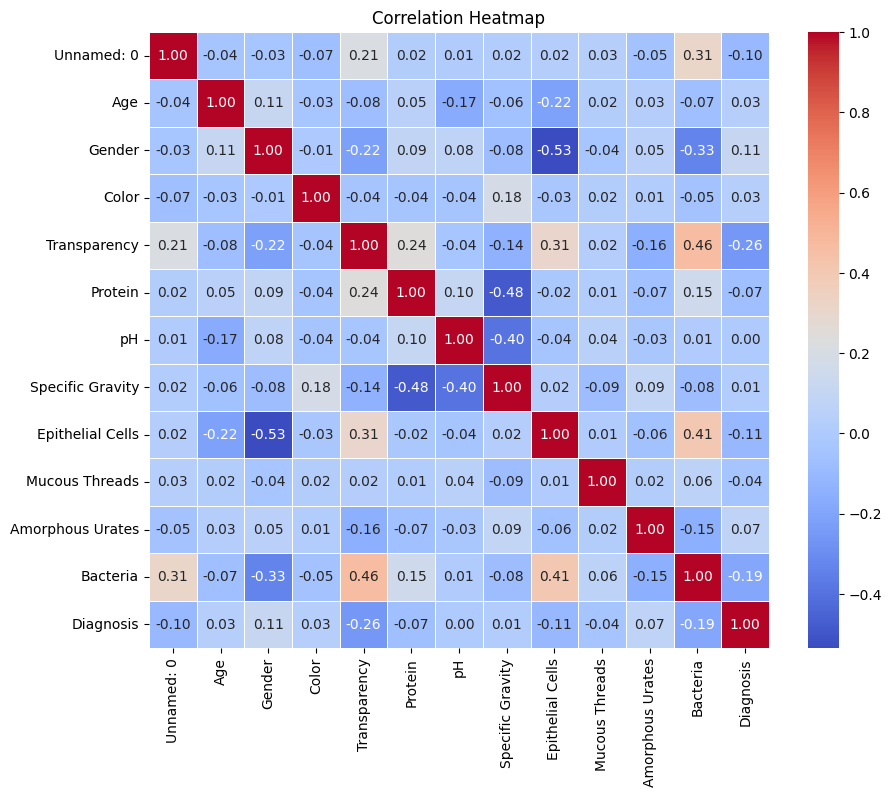

In [389]:
plt.figure(figsize=(10, 8))
sns.heatmap(urinalysis.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

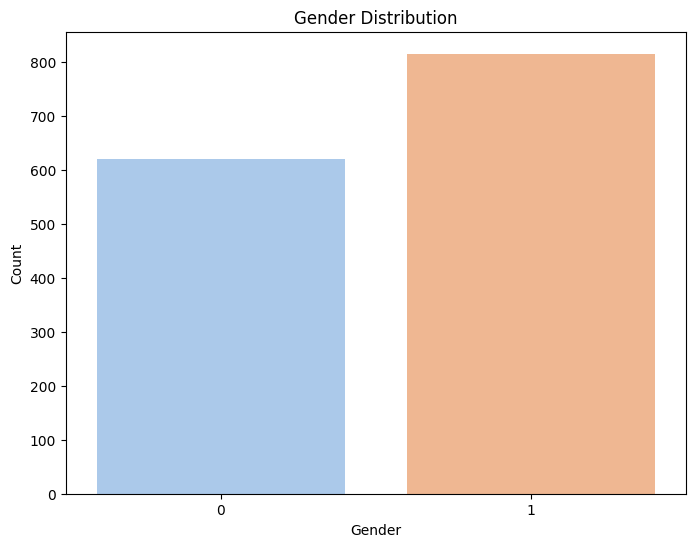

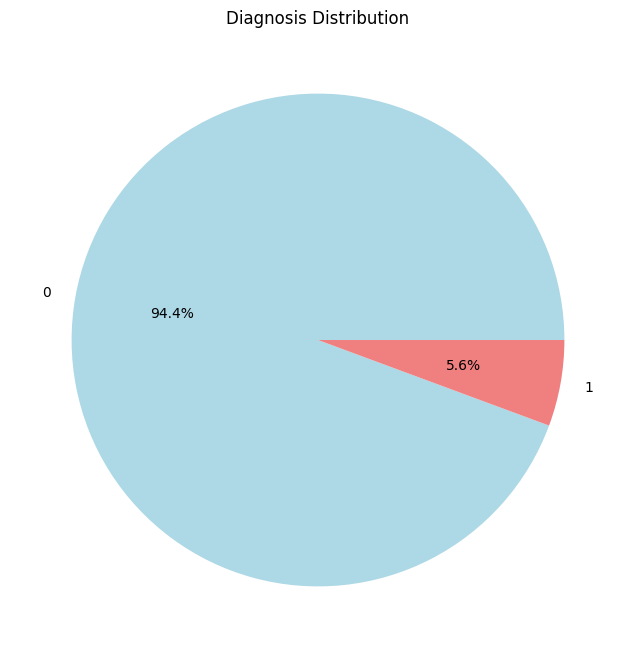

In [390]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=urinalysis, palette='pastel', hue='Gender', legend=False)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

diagnosis_count = urinalysis['Diagnosis'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(diagnosis_count, labels=diagnosis_count.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Diagnosis Distribution')
plt.show()


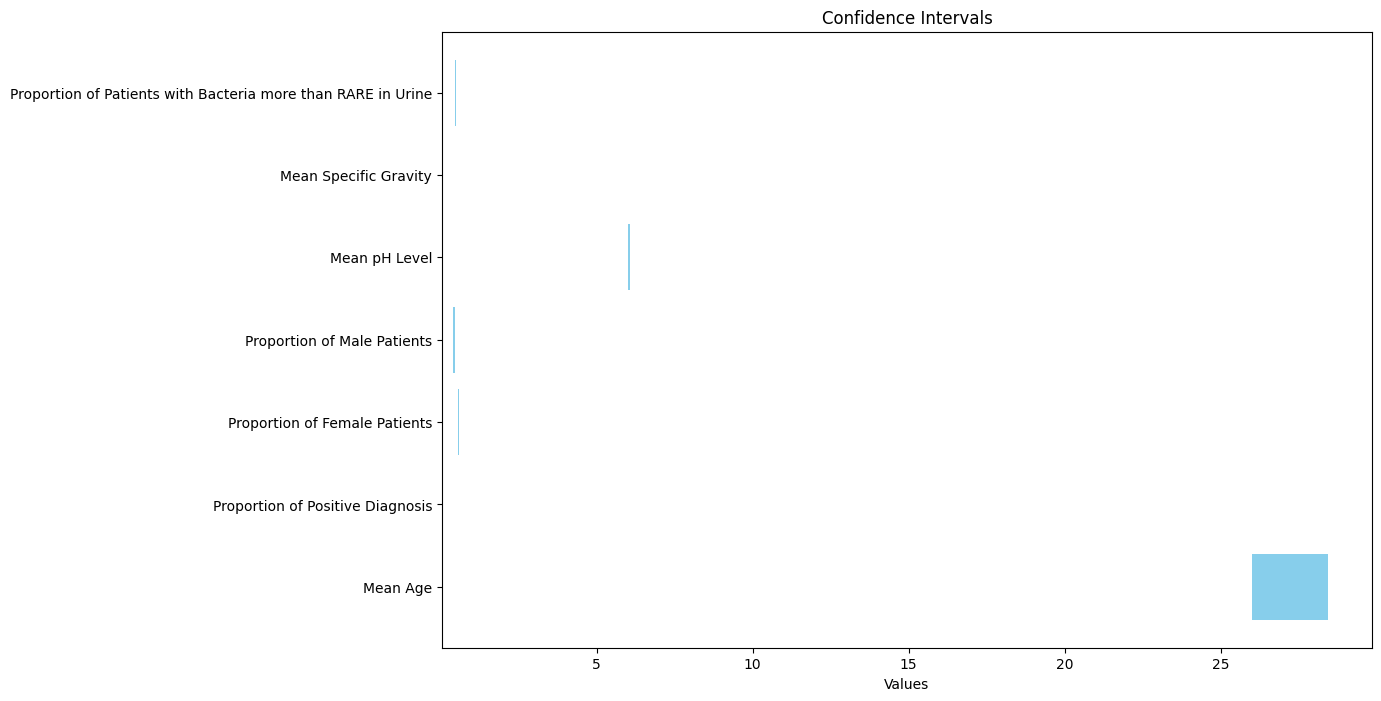

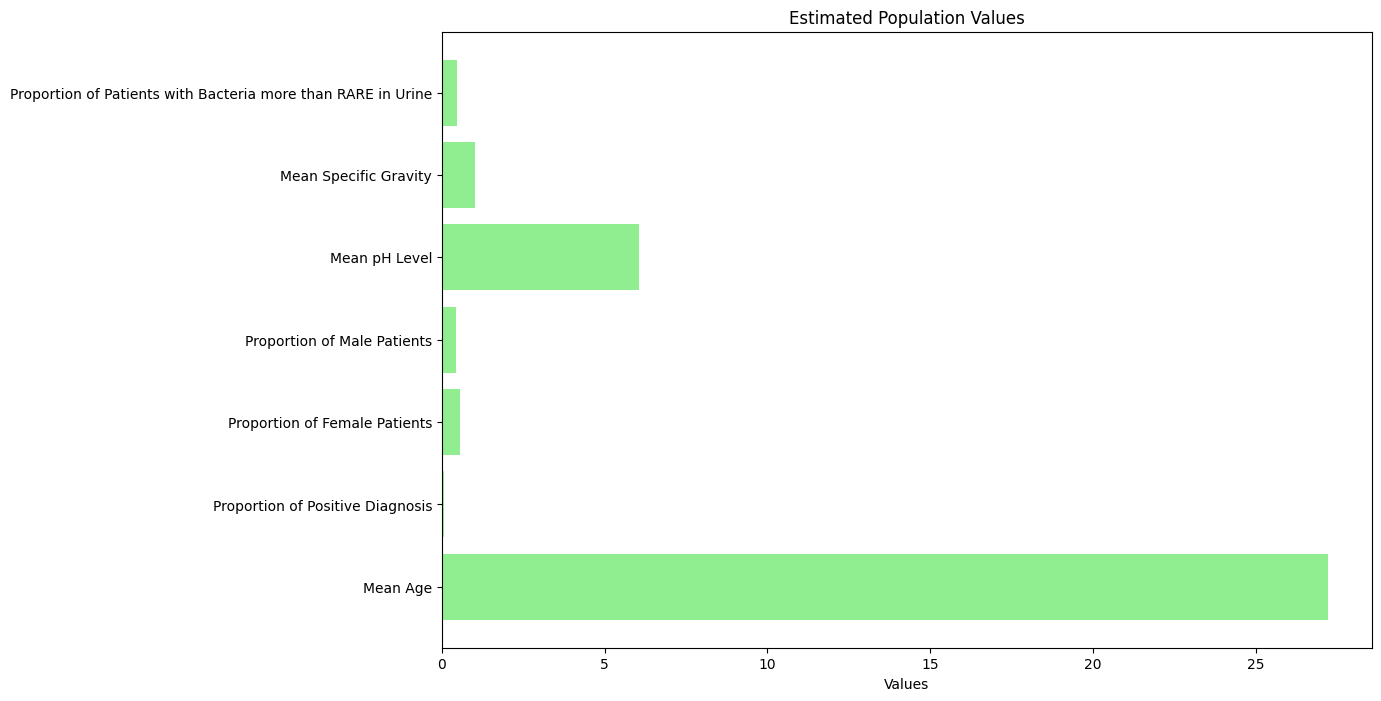

In [391]:
plt.figure(figsize=(12, 8))
plt.barh(list(conf_intervals.keys()), [interval[1] - interval[0] for interval in conf_intervals.values()],
         left=[interval[0] for interval in conf_intervals.values()], color='skyblue')
plt.xlabel('Values')
plt.title('Confidence Intervals')
plt.show()

plt.figure(figsize=(12, 8))
plt.barh(list(estimated_population_values.keys()), estimated_population_values.values(), color='lightgreen')
plt.xlabel('Values')
plt.title('Estimated Population Values')
plt.show()

Here is an overview of the findings after combing through this dataset:


1.  Particpants in this dataset belong to one or more of these categories
  * yellow coloured urine
  * urine with clear transparency
  * possess either negative or trace amounts of protein
  * possess some amount of mucous threads
  * possess no amorhpous urates in their urine
  * possess not many epithelial cells in their urine
  * not many wbc or rbc found in their urine
  * test negative
  * possess bacteria that is either rare or few in quantity

2.   There is correlation between
  * gender and a positive diagnosis
  * high levels of WBC and a positive diagnosis
  * urine without a clear transparency and a positve diagnosis
  * high levels of amorphous urates and ph
  * high levels of amorphous urates and a positive diagnosis
  * traces of protein and a positive diagnosis
  * levels of epithelial cells present and a positive diagnosis
  * transparency and bacteria
  * epithelial cells and bacteria
  * epithelial cells and transparency

3.   There is no correlation between
  * age and diagnosis
  * ph and bacteria
  * ph and diagnosis
  * mucous threads and diagnosis
  * age and ph
  * age and specific gravity
  * ph and specific gravity
  * gender and epithelil cells
  * protein and specific gravity
  
4.   A significant amount of participants tested are less than 1 year old

5. * Estimated population Mean Age: 27.21393728222996
   * Estimated population Proportion of Positive Diagnosis: 0.05644599303135889  = 5%
   * Estimated population Proportion of Female Patients: 0.5679442508710801 = 57%
   * Estimated population Proportion of Male Patients: 0.43205574912891986 = 43%
   * Estimated population Mean pH Level: 6.0529616724738675
   * Estimated population Mean Specific Gravity: 1.0158466898954703
   * Estimated population Proportion of Patients with Bacteria more than RARE in Urine: 0.4745644599303136 = 47%


